# Phân tích trend mua sắm theo từng Vùng (Region). Khám phá đặc trưng mua sắm của các Vùng.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dataflow import df_train, df_test, df_geography, df_product
import matplotlib.pyplot as plt
import warnings

In [2]:
# Kết nối tự nhiên giữa các bảng
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')

In [3]:
df.info()
# COGS: Cost of Goods Sold là vốn chi phí để sản xuất ra sản phẩm

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901561 entries, 0 to 901560
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ProductID  901561 non-null  int64         
 1   Date       901561 non-null  datetime64[ns]
 2   Zip        901561 non-null  int64         
 3   Units      901561 non-null  int64         
 4   Revenue    901561 non-null  float64       
 5   COGS       901561 non-null  float64       
 6   City       901561 non-null  object        
 7   State      901561 non-null  object        
 8   Region     901561 non-null  object        
 9   District   901561 non-null  object        
 10  Category   901561 non-null  object        
 11  Segment    901561 non-null  object        
 12  Product    901561 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 89.4+ MB


In [4]:
df.head()

ProductID       Date    Zip  Units    Revenue          COGS  \
0       1228 2013-07-31  78773     12   19648.44  12309.747660   
1        781 2014-03-12  90501     16   20351.52  13497.128064   
2       2090 2013-11-29  44460     26  111367.62  91488.499830   
3       1116 2018-08-29  30122     12   36280.44  21967.806420   
4        993 2013-04-27  75789     14   55557.18  48645.866808   

                 City State   Region      District Category       Segment  \
0          Austin, TX    TX  Central  District #23    Urban   Convenience   
1        Torrance, CA    CA     West  District #37    Rural  Productivity   
2           Salem, OH    OH     East  District #14    Urban   Convenience   
3  Lithia Springs, GA    GA     East  District #09    Rural        Select   
4           Troup, TX    TX  Central  District #24    Urban   Convenience   

        Product  
0   Pirum UC-30  
1  Natura RP-69  
2  Currus UC-25  
3   Pirum RS-04  
4  Natura UC-56

### 📊 Ý nghĩa các cột trong dữ liệu

| **Cột**       | **Ý nghĩa** |
|--------------|------------|
| **ProductID** | ✅ Mã sản phẩm duy nhất. Mỗi sản phẩm có một ID riêng để theo dõi trong hệ thống. |
| **Date** | 📅 Ngày giao dịch. Giao dịch diễn ra vào ngày nào? Dữ liệu có thể dùng để phân tích xu hướng theo thời gian. |
| **Zip** | 🏠 Mã ZIP (Mã bưu điện). Xác định vị trí giao dịch, có thể dùng để phân tích theo khu vực địa lý nhỏ. |
| **Units** | 📦 Số lượng bán. Tổng số đơn vị sản phẩm đã bán trong giao dịch đó. |
| **Revenue** | 💰 Tổng doanh thu (tính bằng USD). Tính bằng công thức: `Revenue = Units × Giá bán trung bình`. Giá bán sản phẩm tại thời điểm khác nhau có thể khác nhau |
| **COGS** | 💲 Chi phí hàng hóa bán ra (Cost of Goods Sold - COGS). Đây là chi phí sản xuất hoặc mua hàng để tạo ra sản phẩm đó. |
| **City** | 🏙️ Thành phố nơi diễn ra giao dịch. Giúp phân tích doanh số theo địa lý. |
| **State** | 🇺🇸 Bang (State) của Mỹ nơi sản phẩm được bán. |
| **Region** | 🗺️ Vùng (Region) của Mỹ nơi diễn ra giao dịch. Ví dụ: `East`, `West`, `Central`. Dùng để phân tích doanh số theo vùng. |
| **District** | 📍 Quận (District). Là cấp hành chính nhỏ hơn của `Region`, giúp phân tích sâu hơn từng khu vực nhỏ. |
| **Category** | 🎯 Danh mục sản phẩm (Category). Chỉ định sản phẩm thuộc loại nào: `Urban`, `Rural`, `Youth`, `Mix`. |
| **Segment** | 🏷️ Phân khúc sản phẩm (Segment). Chỉ định nhóm sản phẩm theo đặc


## 1. Tổng hợp và sắp xếp tổng doanh thu, số lượng sản phẩm bán ra, vốn bỏ ra, lợi nhuận theo từng vùng

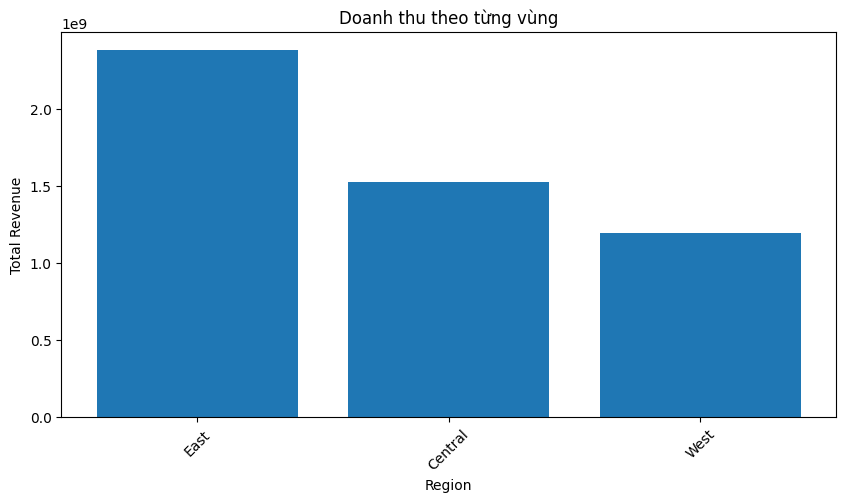

In [5]:
# Tổng hợp doanh thu theo vùng (Region)
region_revenue = df.groupby("Region")["Revenue"].sum().sort_values(ascending=False)

# Vẽ biểu đồ doanh thu theo vùng
plt.figure(figsize=(10, 5))
plt.bar(region_revenue.index, region_revenue.values)
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.title("Doanh thu theo từng vùng")
plt.xticks(rotation=45)
plt.show()

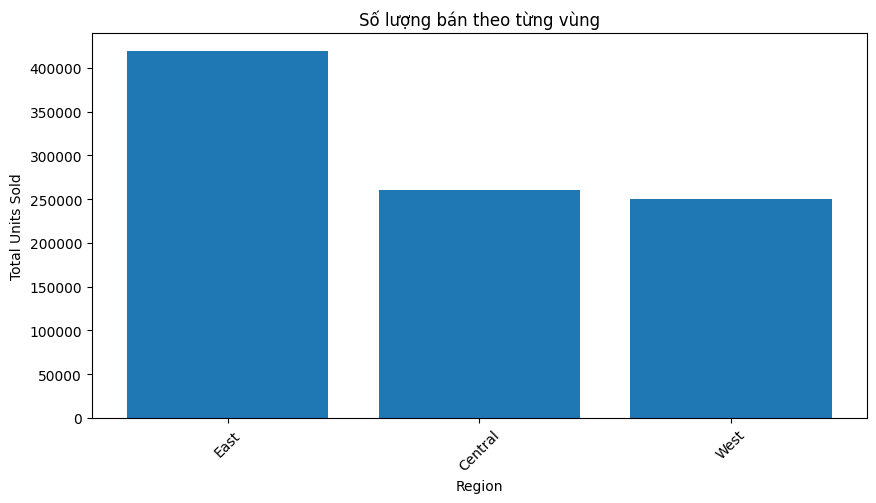

In [6]:
# Tổng hợp số lượng bán theo vùng
region_units = df.groupby("Region")["Units"].sum().sort_values(ascending=False)

# Vẽ biểu đồ số lượng bán theo vùng
plt.figure(figsize=(10, 5))
plt.bar(region_units.index, region_units.values)
plt.xlabel("Region")
plt.ylabel("Total Units Sold")
plt.title("Số lượng bán theo từng vùng")
plt.xticks(rotation=45)
plt.show()

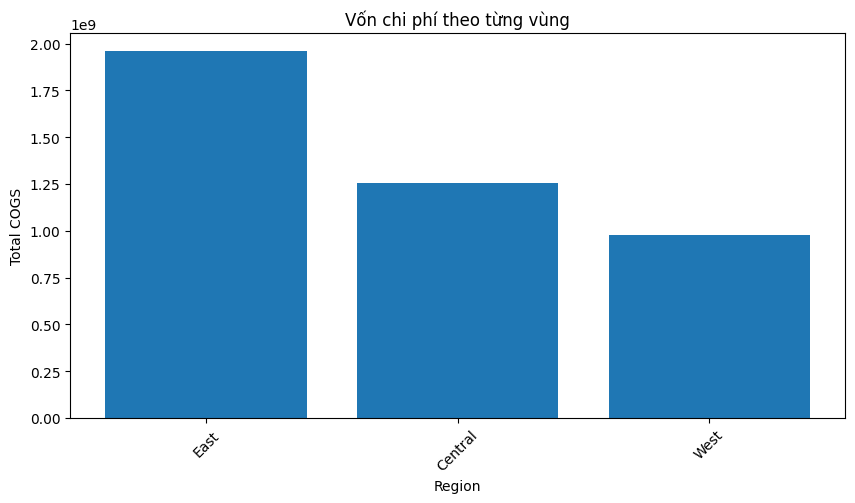

In [7]:
# Tổng hợp vốn chi phí theo vùng
region_cogs = df.groupby("Region")["COGS"].sum().sort_values(ascending=False)

# Vẽ biểu đồ vốn chi phí theo vùng
plt.figure(figsize=(10, 5))
plt.bar(region_cogs.index, region_cogs.values)
plt.xlabel("Region")
plt.ylabel("Total COGS")
plt.title("Vốn chi phí theo từng vùng")
plt.xticks(rotation=45)
plt.show()

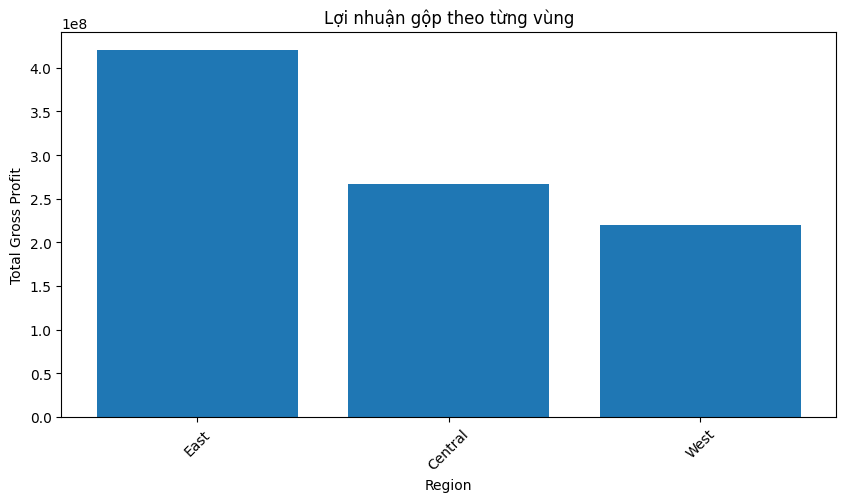

In [8]:
# Tính toán lợi nhuận gộp (Gross Profit)
df["Gross_Profit"] = df["Revenue"] - df["COGS"]

# Tổng hợp lợi nhuận theo vùng (Region)
region_profit = df.groupby("Region")["Gross_Profit"].sum().sort_values(ascending=False)

# Vẽ biểu đồ lợi nhuận theo vùng
plt.figure(figsize=(10, 5))
plt.bar(region_profit.index, region_profit.values)
plt.xlabel("Region")
plt.ylabel("Total Gross Profit")
plt.title("Lợi nhuận gộp theo từng vùng")
plt.xticks(rotation=45)
plt.show()


## 2. Xu hướng doanh thu theo thời gian trong từng vùng

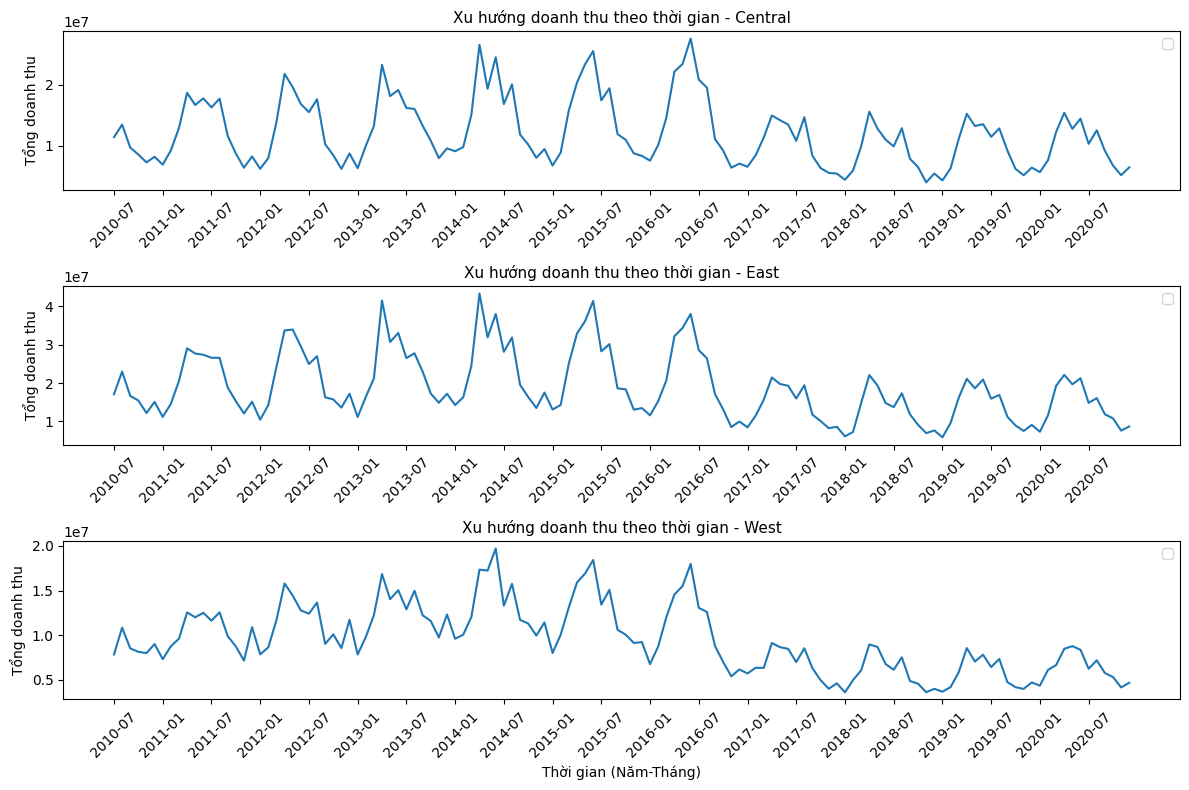

In [6]:
import matplotlib.pyplot as plt

# Tổng hợp doanh thu theo tháng và vùng
df["YearMonth"] = df["Date"].dt.to_period("M")
region_monthly_revenue = df.groupby(["YearMonth", "Region"])["Revenue"].sum().unstack()

# Chuyển Period thành string để vẽ biểu đồ đúng
region_monthly_revenue.index = region_monthly_revenue.index.astype(str)

# Lấy danh sách các vùng (giả sử có 3 vùng)
regions = region_monthly_revenue.columns

# Tạo 3 subplot (3 hàng, 1 cột), không share x để có thể tùy chỉnh ticks riêng
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))

for i, region in enumerate(regions):
    # Vẽ đường cho vùng region
    axes[i].plot(region_monthly_revenue.index,
                 region_monthly_revenue[region],
                 )

    # Đặt tiêu đề và nhãn
    axes[i].set_title(f"Xu hướng doanh thu theo thời gian - {region}", fontsize=11)
    axes[i].set_ylabel("Tổng doanh thu", fontsize=10)

    # Căn chỉnh nhãn trục x (tùy chọn hiển thị mỗi 6 tháng)
    axes[i].set_xticks(range(0, len(region_monthly_revenue.index), 6))
    axes[i].set_xticklabels(region_monthly_revenue.index[::6], rotation=45)

    # Thêm legend cho mỗi subplot
    axes[i].legend()

# Chỉ đặt nhãn trục x cho subplot cuối cùng (hoặc bạn có thể đặt cho từng subplot)
axes[-1].set_xlabel("Thời gian (Năm-Tháng)", fontsize=10)

plt.tight_layout()
plt.show()

# ignore warning
import warnings
warnings.filterwarnings('ignore')


## 3. Phân tích Segment và Category theo số lượng sản phẩm bán ra của từng vùng

### Category (danh mục sản phẩm): Chia sản phẩm theo đặc điểm sử dụng hoặc đối tượng khách hàng mục tiêu.
- `Urban`: Sản phẩm dành cho môi trường đô thị.
- `Rural`: Sản phẩm phục vụ vùng nông thôn.
- `Youth`: Dòng sản phẩm dành riêng cho khách hàng trẻ tuổi (thanh thiếu niên, sinh viên, hoặc giới trẻ năng động).
- `Mix`: Dòng sản phẩm không thuộc một danh mục cụ thể nào mà có thể là sự kết hợp của nhiều nhóm khác nhau.

### Theo từng khu vực

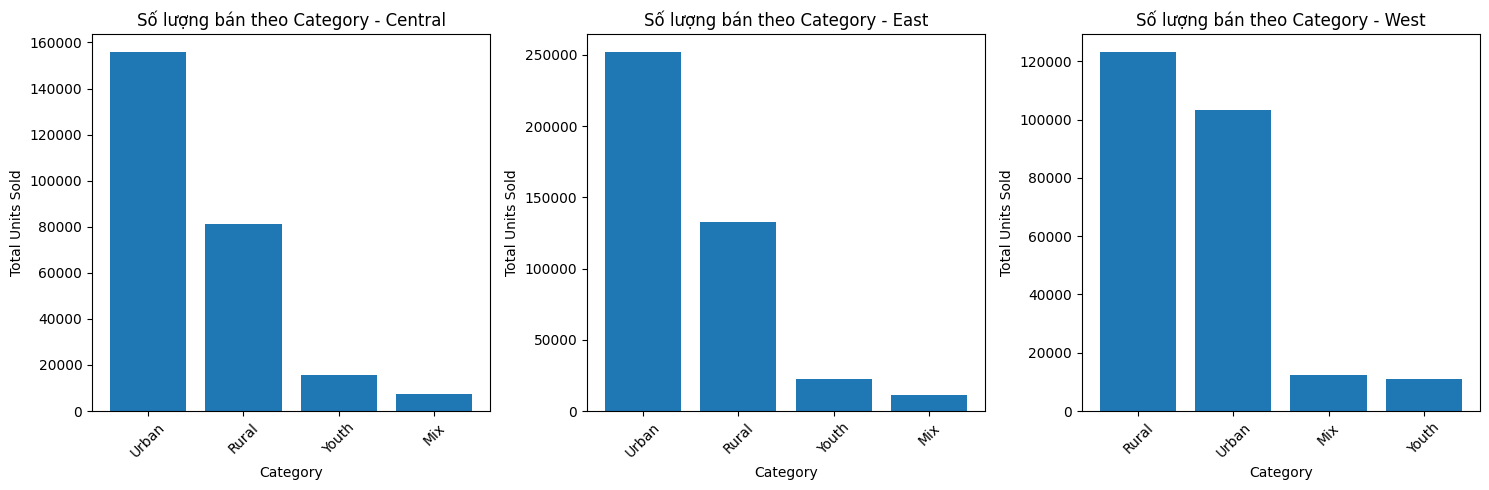

In [10]:
import matplotlib.pyplot as plt

# Lấy danh sách các vùng (Region) bạn muốn phân tích.
# Giả sử bạn có 3 vùng: Central, East, West.
regions = ["Central", "East", "West"]

# Tạo 3 subplot nằm ngang
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Lặp qua từng vùng và từng trục tương ứng
# 
for i, region in enumerate(regions):
    # Lọc dữ liệu theo vùng
    df_region = df[df["Region"] == region]
    
    # Tính tổng Units bán được theo Category cho vùng này
    category_sales = (
        df_region.groupby("Category")["Units"].sum().sort_values(ascending=False)
    )
    
    # Vẽ biểu đồ cột, chỗ này cần dùng đến cái i này
    axes[i].bar(category_sales.index, category_sales.values)
    axes[i].set_xlabel("Category")
    axes[i].set_ylabel("Total Units Sold")
    axes[i].set_title(f"Số lượng bán theo Category - {region}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Đánh giá các biểu đồ trên:
- Tập trung nguồn lực vào dòng sản phẩm Urban và Rural, vì đây là thị trường lớn nhất.
- Đánh giá lại dòng sản phẩm Youth và Mix, có thể cần cải thiện chiến lược tiếp thị hoặc thay đổi dòng sản phẩm. Đặc biệt dòng sản phẩm Mix có đối tượng sử dụng sản phẩm rất hạn chế.
- Nghiên cứu thêm về loại sản phẩm cụ thể trong từng Category để tối ưu chiến lược nhập hàng.

### Segment (Phân khúc sản phẩm): Chia sản phẩm theo nhu cầu hoặc giá trị sử dụng
- `Convenience`: Sản phẩm phổ thông, tiện lợi
- `Productivity`: Sản phẩm giúp người dùng tăng hiệu suất làm việc (có thể là công nghệ, thời trang công sở, v.v.).
- `Select`: Có thể là dòng cao cấp, mang tính thời trang hoặc đặc biệt.
- `Moderation`: Sản phẩm cân bằng giữa tiện ích, giá cả và chất lượng, phù hợp với khách hàng phổ thông.
- `Extreme`: Dòng sản phẩm chuyên biệt, có thể là sản phẩm thể thao, leo núi, hoặc các mặt hàng bền bỉ, cao cấp hơn.
- `Youth`: Sản phẩm hướng đến giới trẻ, thường có thiết kế thời trang, phong cách năng động.
- `Select`:	Dòng sản phẩm cao cấp, thiết kế tinh tế, giá thành cao hơn.
- `All Season`:	Sản phẩm có thể sử dụng quanh năm, không phụ thuộc vào mùa vụ.
- `Regular`:	Dòng sản phẩm tiêu chuẩn, không thuộc nhóm đặc biệt nào, có thể là các mặt hàng cơ bản.

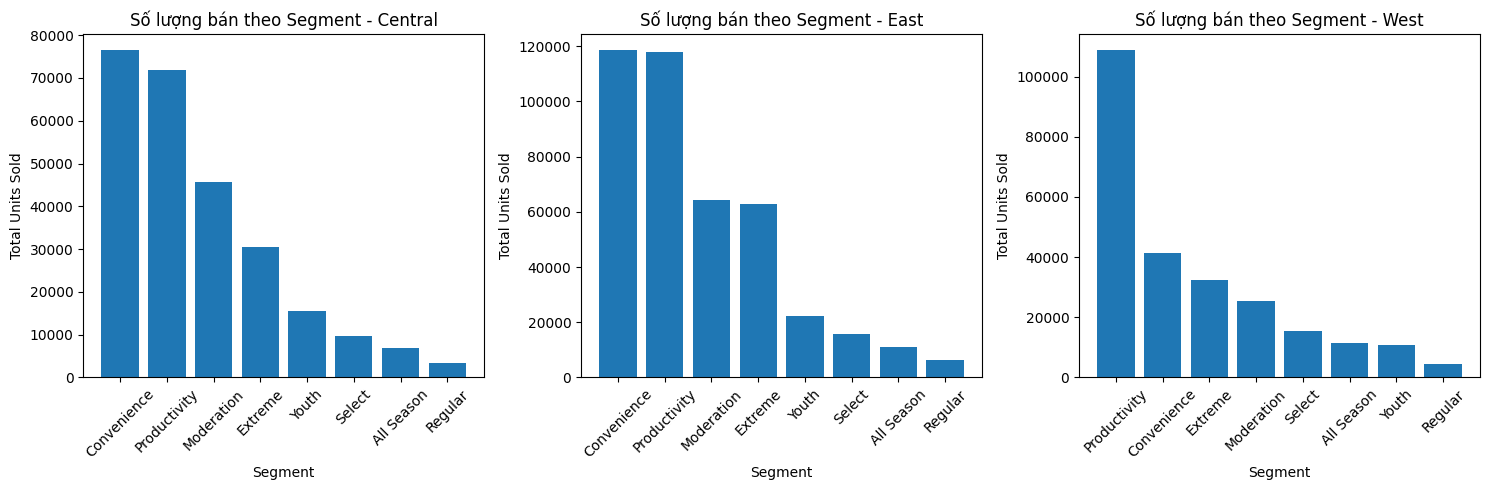

In [11]:
# Lấy danh sách các vùng (Region) bạn muốn phân tích
regions = ["Central", "East", "West"]

# Tạo 3 subplot nằm ngang
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Lặp qua từng vùng và từng trục tương ứng
for i, region in enumerate(regions):
    # Lọc dữ liệu theo vùng
    df_region = df[df["Region"] == region]
    
    # Tính tổng Units bán được theo Segment cho vùng này
    segment_sales = df_region.groupby("Segment")["Units"].sum().sort_values(ascending=False)

    # Vẽ biểu đồ cột
    axes[i].bar(segment_sales.index, segment_sales.values)
    axes[i].set_xlabel("Segment")
    axes[i].set_ylabel("Total Units Sold")
    axes[i].set_title(f"Số lượng bán theo Segment - {region}")
    axes[i].tick_params(axis='x', rotation=45)  # Xoay nhãn để dễ đọc

plt.tight_layout()
plt.show()

### Đánh giá:
- Segment Productivity và Convenience có số lượng bán cao nhất, do nhu cầu xử dụng của các dòng sản phẩm này cao, đối tượng sử dụng đa dạng. Do đó công ty nên tập trung nhiều hơn vào các phân khúc này, mở rộng danh mục sản phẩm.
- Moderate và Extreme có doanh số trung bình. Xem xét mở rộng hoặc tinh chỉnh sản phẩm trong Moderation & Extreme để tối ưu doanh thu.
- Youth, Select, All Season, Regular có doanh số thấp. Có thể cần thay đổi chiến lược tiếp thị hoặc cải tiến sản phẩm.

### Nhóm theo Segment và Category

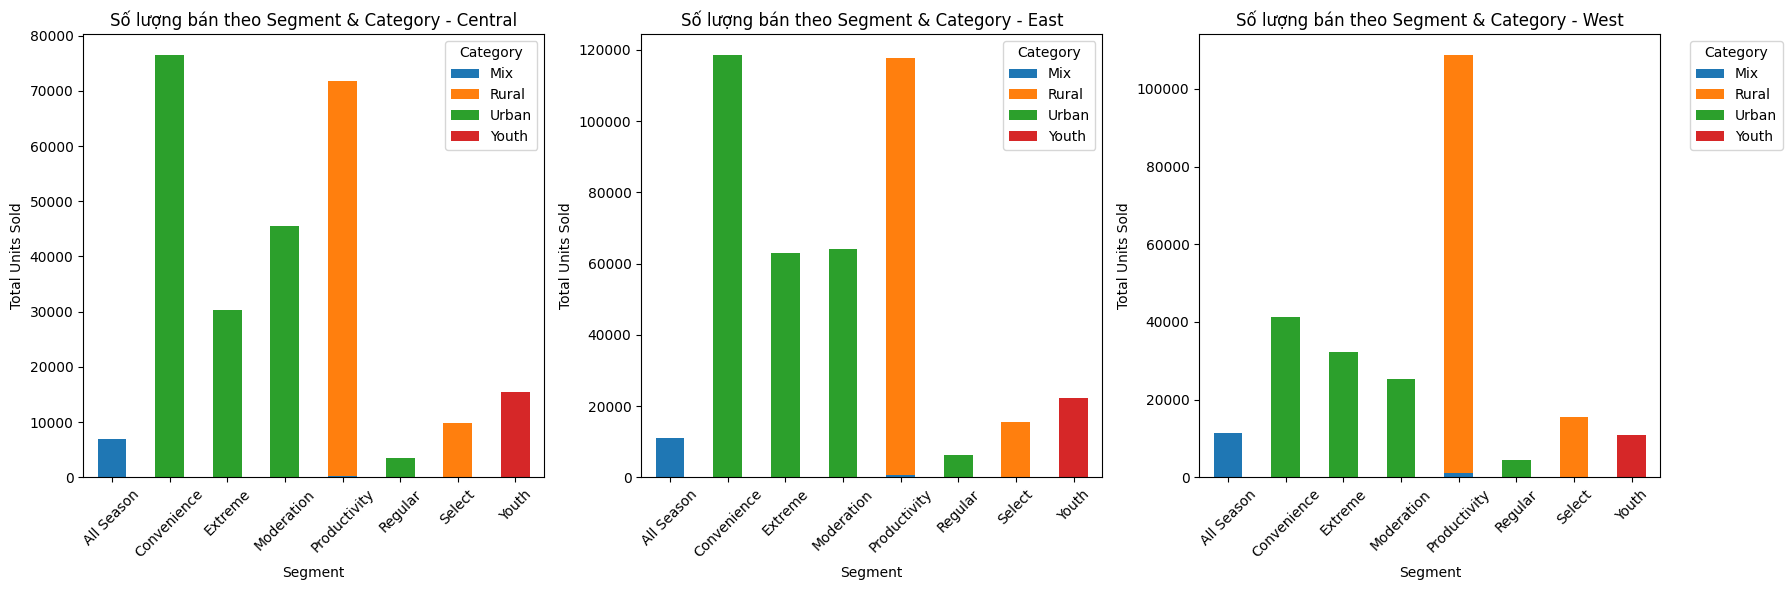

In [12]:
import matplotlib.pyplot as plt

# Lấy danh sách các vùng (Region) bạn muốn phân tích
regions = ["Central", "East", "West"]

# Tạo 3 subplot nằm ngang
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Lặp qua từng vùng và từng trục tương ứng
for i, region in enumerate(regions):
    # Lọc dữ liệu theo vùng
    df_region = df[df["Region"] == region]
    
    # Tính tổng số lượng bán theo Segment và Category
    segment_category_sales = df_region.groupby(["Segment", "Category"])["Units"].sum().unstack()

    # Vẽ biểu đồ stacked bar chart
    segment_category_sales.plot(kind="bar", stacked=True, ax=axes[i])

    # Thiết lập tiêu đề và nhãn
    axes[i].set_xlabel("Segment")
    axes[i].set_ylabel("Total Units Sold")
    axes[i].set_title(f"Số lượng bán theo Segment & Category - {region}")
    axes[i].tick_params(axis='x', rotation=45)

# Hiển thị legend ở subplot cuối cùng để tránh trùng lặp
axes[-1].legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


### Đánh giá:
- Urban có nhiều phân khúc bán chạy (Convenience, Extreme, Moderation).
- Rural chủ yếu tập trung vào Productivity. Có thể khách hàng ở khu vực này thích các sản phẩm có tính thực dụng cao.
- Youth và Select có doanh số thấp hơn. Nhóm khách hàng này có thể chưa được tiếp cận hiệu quả.
- Regular, All Season, Select có doanh số thấp nhất. Điều này có thể do sản phẩm chưa phù hợp với thị trường hoặc cần nhiều chiến lược quảng bá hơn.

## 4. Phân tích theo Segment và Category theo doanh thu

### Category

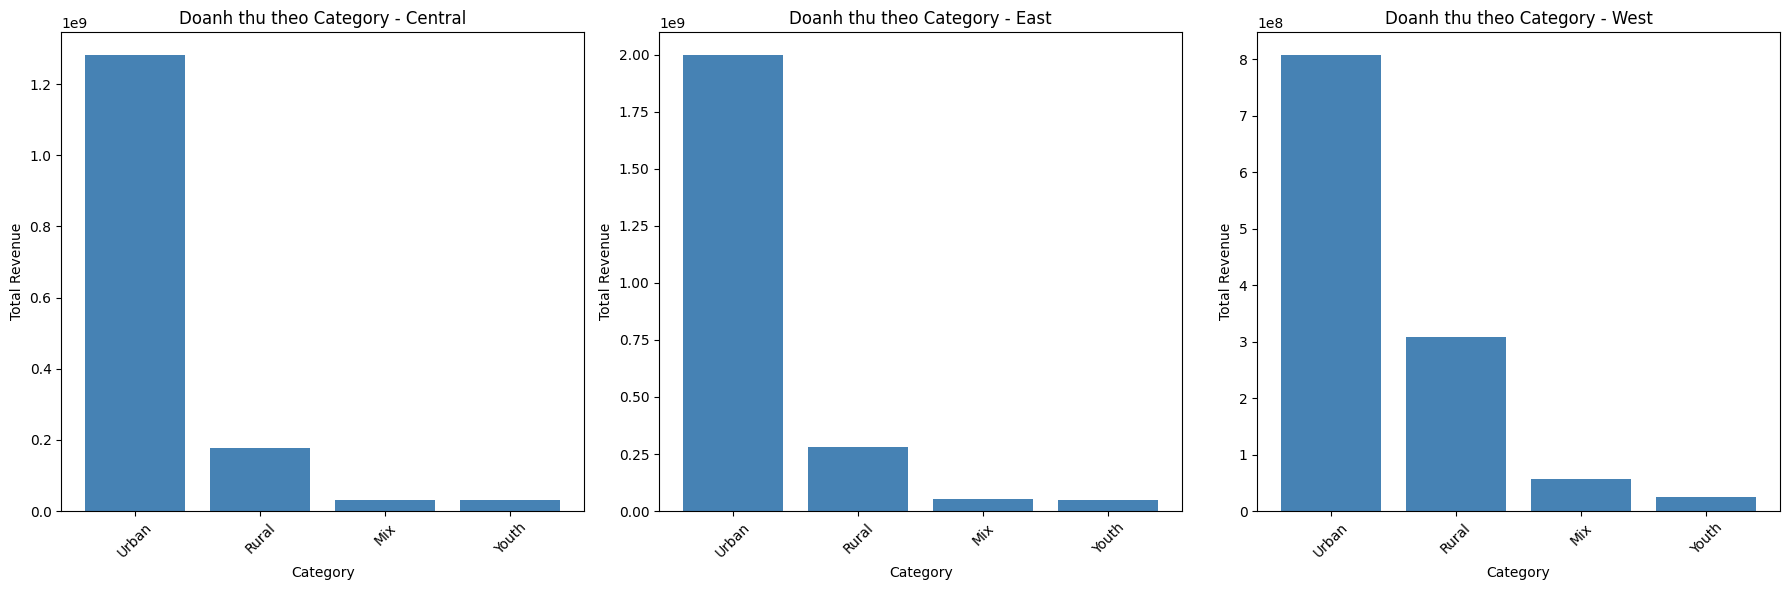

In [13]:
# Lấy danh sách các vùng (Region)
regions = ["Central", "East", "West"]

# Tạo 3 subplot nằm ngang
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Lặp qua từng vùng và từng trục tương ứng
for i, region in enumerate(regions):
    # Lọc dữ liệu theo vùng
    df_region = df[df["Region"] == region]
    
    # Nhóm dữ liệu theo Category để tính tổng Revenue
    category_revenue = df_region.groupby("Category")["Revenue"].sum().sort_values(ascending=False)

    # Vẽ biểu đồ cột
    axes[i].bar(category_revenue.index, category_revenue.values, color="steelblue")
    
    # Thiết lập tiêu đề và nhãn
    axes[i].set_xlabel("Category")
    axes[i].set_ylabel("Total Revenue")
    axes[i].set_title(f"Doanh thu theo Category - {region}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Segment

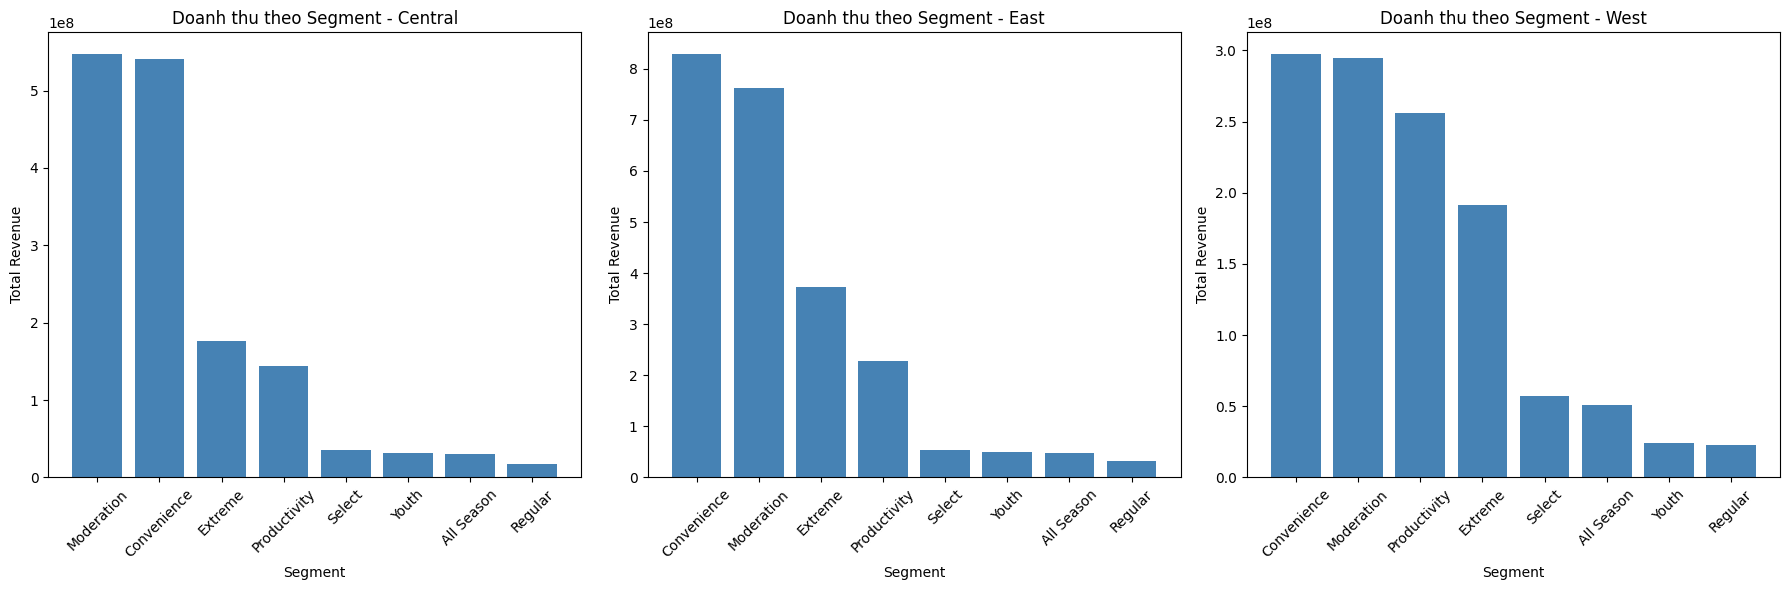

In [14]:
# Lấy danh sách các vùng (Region)
regions = ["Central", "East", "West"]

# Tạo 3 subplot nằm ngang
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Lặp qua từng vùng và từng trục tương ứng
for i, region in enumerate(regions):
    # Lọc dữ liệu theo vùng
    df_region = df[df["Region"] == region]
    
    # Nhóm dữ liệu theo Segment để tính tổng Revenue
    segment_revenue = df_region.groupby("Segment")["Revenue"].sum().sort_values(ascending=False)

    # Vẽ biểu đồ cột
    axes[i].bar(segment_revenue.index, segment_revenue.values, color="steelblue")

    # Thiết lập tiêu đề và nhãn
    axes[i].set_xlabel("Segment")
    axes[i].set_ylabel("Total Revenue")
    axes[i].set_title(f"Doanh thu theo Segment - {region}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Segment và Category

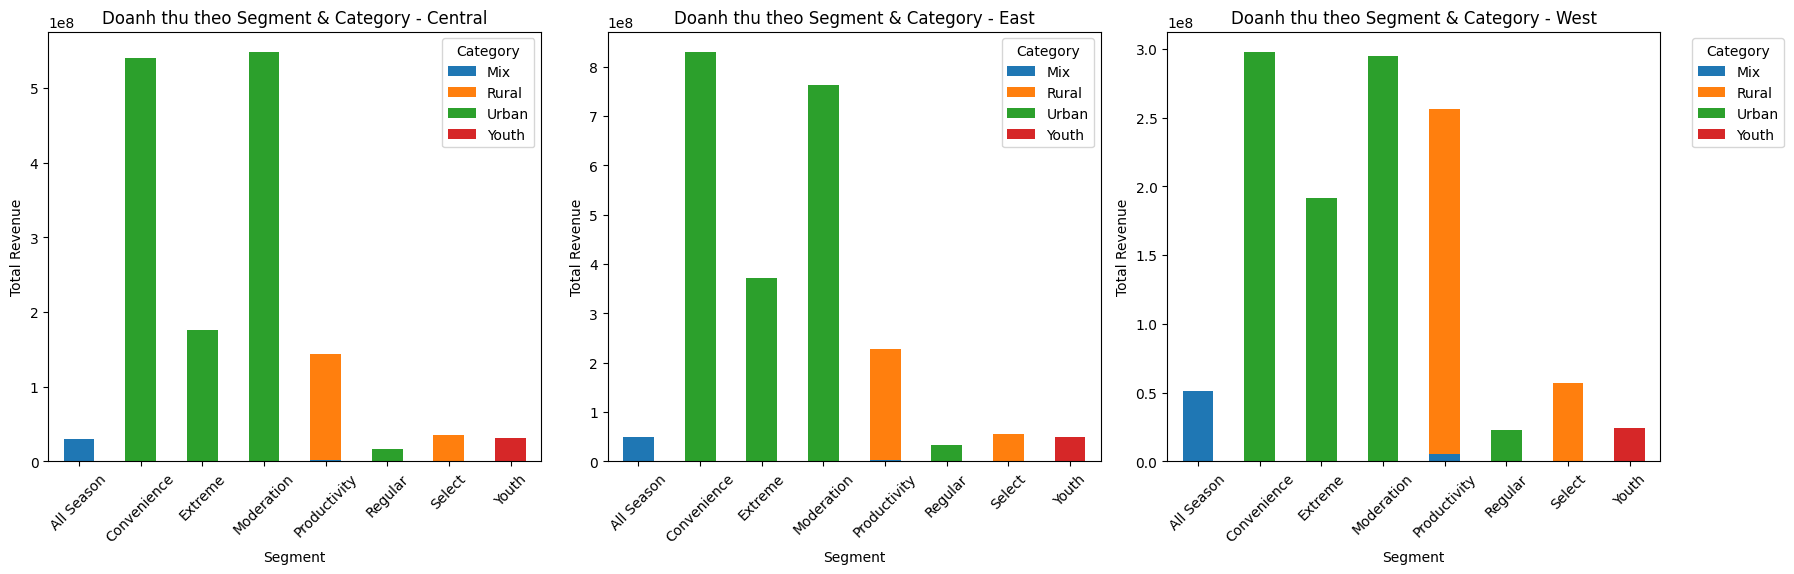

In [15]:
# Lấy danh sách các vùng (Region)
regions = ["Central", "East", "West"]

# Tạo 3 subplot nằm ngang
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Lặp qua từng vùng và từng trục tương ứng
for i, region in enumerate(regions):
    # Lọc dữ liệu theo vùng
    df_region = df[df["Region"] == region]
    
    # Nhóm dữ liệu theo Segment và Category để tính tổng Revenue
    segment_category_revenue = df_region.groupby(["Segment", "Category"])["Revenue"].sum().unstack()

    # Vẽ biểu đồ stacked bar chart
    segment_category_revenue.plot(kind="bar", stacked=True, ax=axes[i])

    # Thiết lập tiêu đề và nhãn
    axes[i].set_xlabel("Segment")
    axes[i].set_ylabel("Total Revenue")
    axes[i].set_title(f"Doanh thu theo Segment & Category - {region}")
    axes[i].tick_params(axis='x', rotation=45)

# Hiển thị legend ở subplot cuối cùng để tránh trùng lặp
axes[-1].legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

## 5. Xác định hệ số tương quan Pearson giữa doanh thu và số lượng sản phẩm bán ra theo từng vùng

### Công thức hệ số tương quan Pearson

Công thức tính hệ số tương quan Pearson được định nghĩa như sau:

$$
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2} \times \sqrt{\sum (Y_i - \bar{Y})^2}}
$$

Trong đó:
- $ X_i, Y_i $ là các giá trị của hai biến cần so sánh.
- $ \bar{X}, \bar{Y} $ là giá trị trung bình của hai biến.
- **Tử số:** $ \sum (X_i - \bar{X})(Y_i - \bar{Y}) $ đo lường mức độ thay đổi cùng nhau của hai biến.
- **Mẫu số:** $ \sqrt{\sum (X_i - \bar{X})^2} \times \sqrt{\sum (Y_i - \bar{Y})^2} $ chuẩn hóa giá trị để không phụ thuộc vào đơn vị đo lường.

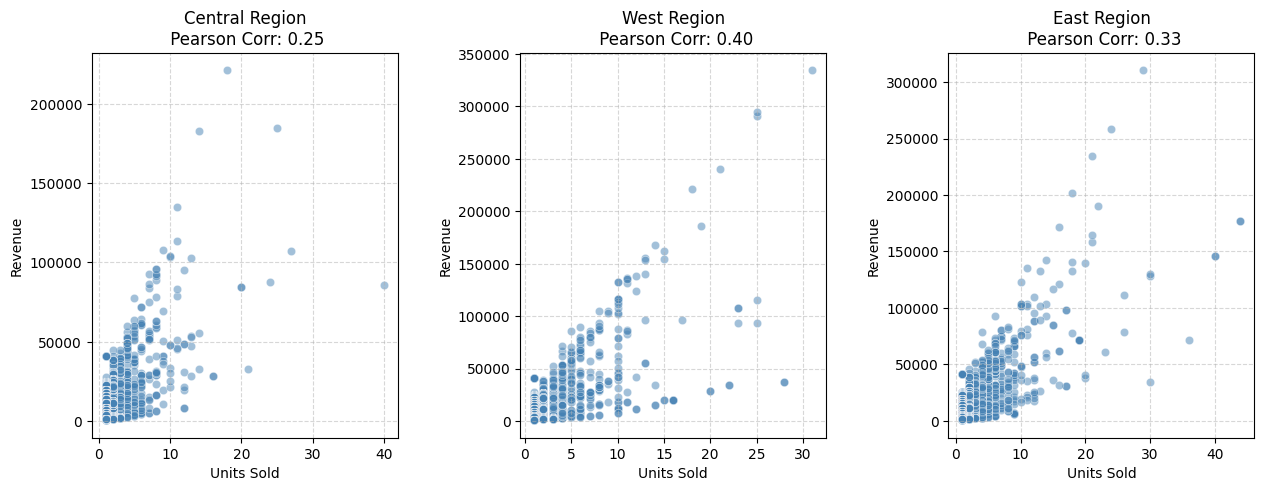

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lấy danh sách vùng
regions = df["Region"].unique()

# Tạo 3 subplot theo chiều ngang
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Điều chỉnh khoảng cách giữa các subplot
plt.subplots_adjust(wspace=0.4)

# Vẽ scatter plot cho từng vùng
for i, region in enumerate(regions):
    # Lọc dữ liệu theo vùng
    df_region = df[df["Region"] == region]
    
    # Tính hệ số tương quan Pearson giữa Units và Revenue
    correlation = df_region["Units"].corr(df_region["Revenue"])
    
    # Vẽ scatter plot
    sns.scatterplot(x=df_region["Units"], y=df_region["Revenue"], ax=axes[i], color="steelblue", alpha=0.5)
    
    # Thiết lập tiêu đề và nhãn
    axes[i].set_xlabel("Units Sold", fontsize=10)
    axes[i].set_ylabel("Revenue", fontsize=10)
    axes[i].set_title(f"{region} Region\n Pearson Corr: {correlation:.2f}", fontsize=12)
    
    # Làm cho biểu đồ dễ nhìn hơn
    axes[i].grid(True, linestyle="--", alpha=0.5)

# Hiển thị biểu đồ
plt.show()

### Đánh giá
- Có mối quan hệ tuyến tính dương yếu giữa số lượng bán `Units` và doanh thu `Revenue`.
- Không phải lúc nào số lượng bán cao cũng dẫn đến doanh thu cao. Giá bán sản phẩm có thể thay đổi theo các thời điểm khác nhau.
- Có thể có các yếu tố khác ảnh hưởng đến doanh thu, ví dụ như giá bán trung bình, loại sản phẩm, mùa vụ, khu vực...

## 6. Top các sản phẩm bán chạy nhất theo từng vùng

### Top 10 sản phẩm có doanh thu tốt nhất theo mỗi vùng

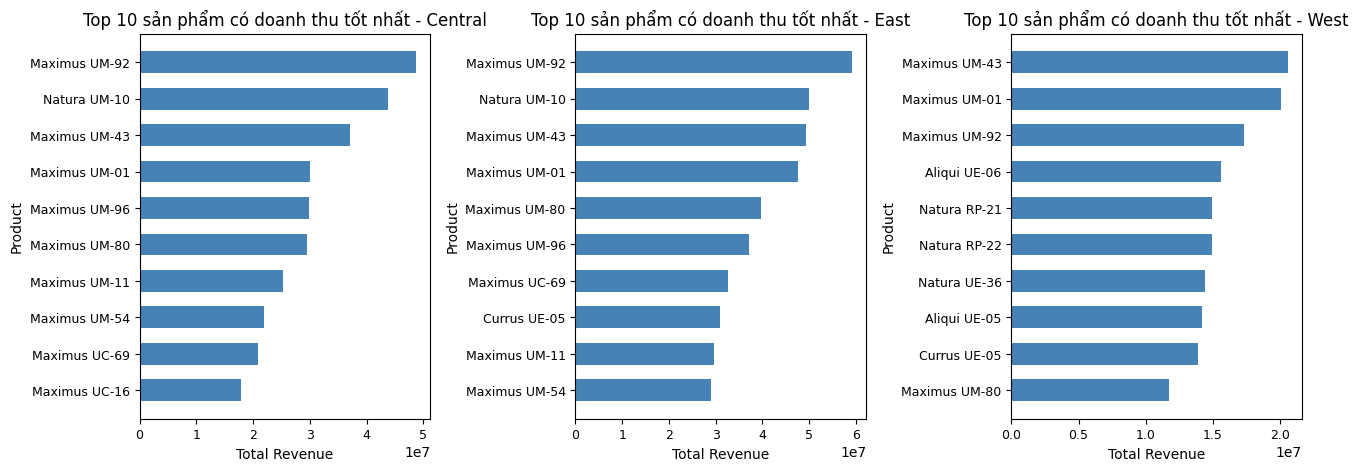

In [6]:
# Nhóm dữ liệu theo Region và Product, tính tổng doanh thu
region_product_revenue = df.groupby(["Region", "Product"])["Revenue"].sum().reset_index()

# Lấy Top 10 sản phẩm có doanh thu tốt nhất trong từng vùng
top_products_per_region = region_product_revenue.groupby("Region").apply(lambda x: x.nlargest(10, "Revenue")).reset_index(drop=True)

# Lấy danh sách vùng
regions = top_products_per_region["Region"].unique()

# Tạo 3 subplot, kích thước (15, 5)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Điều chỉnh khoảng cách giữa các subplot
plt.subplots_adjust(wspace=0.5)

# Vẽ biểu đồ cho từng vùng
for i, region in enumerate(regions):
    region_data = top_products_per_region[top_products_per_region["Region"] == region]
    
    # Vẽ biểu đồ ngang
    axes[i].barh(region_data["Product"], region_data["Revenue"], color="steelblue", height=0.6)
    
    # Thiết lập tiêu đề và nhãn
    axes[i].set_xlabel("Total Revenue", fontsize=10)
    axes[i].set_ylabel("Product", fontsize=10)
    axes[i].set_title(f"Top 10 sản phẩm có doanh thu tốt nhất - {region}", fontsize=12)
    axes[i].tick_params(axis='x', labelsize=9)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].invert_yaxis()  # Đảo ngược trục y để sản phẩm doanh thu cao nhất ở trên cùng

# Hiển thị biểu đồ
plt.show()

# Tắt cảnh báo
warnings.filterwarnings('ignore')


### Top 10 sản phẩm có doanh thu tệ nhất theo từng vùng

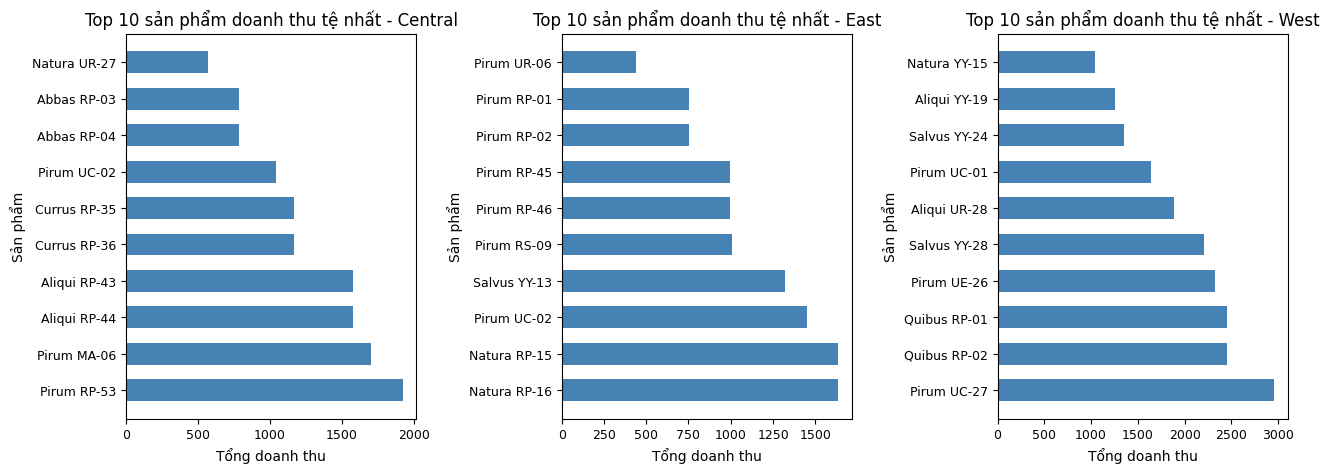

In [18]:
# Nhóm dữ liệu theo Region và Product, tính tổng doanh thu
region_product_revenue = df.groupby(["Region", "Product"])["Revenue"].sum().reset_index()

# Lấy Top 10 sản phẩm có doanh thu tệ nhất (doanh thu thấp nhất) theo từng vùng
worst_products_per_region = region_product_revenue.groupby("Region")\
    .apply(lambda x: x.nsmallest(10, "Revenue")).reset_index(drop=True)

# Lấy danh sách vùng
regions = worst_products_per_region["Region"].unique()

# Tạo 3 subplot theo chiều ngang, giảm kích thước tổng thể
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Điều chỉnh khoảng cách giữa các subplot
plt.subplots_adjust(wspace=0.5)

# Vẽ biểu đồ cho từng vùng
for i, region in enumerate(regions):
    region_data = worst_products_per_region[worst_products_per_region["Region"] == region]
    
    # Vẽ biểu đồ ngang
    axes[i].barh(region_data["Product"], region_data["Revenue"], color="steelblue", height=0.6)
    
    # Thiết lập tiêu đề và nhãn
    axes[i].set_xlabel("Tổng doanh thu", fontsize=10)
    axes[i].set_ylabel("Sản phẩm", fontsize=10)
    axes[i].set_title(f"Top 10 sản phẩm doanh thu tệ nhất - {region}", fontsize=12)
    axes[i].tick_params(axis='x', labelsize=9)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].invert_yaxis()  # Đảo ngược trục y để sản phẩm doanh thu thấp nhất nằm ở trên cùng

# Hiển thị biểu đồ
plt.show()

# Tắt cảnh báo
warnings.filterwarnings('ignore')

## 7. Phân tích ảnh hưởng của các thời điểm trong năm đến doanh thu

### Tổng doanh thu các tháng trong năm của cả 3 khu vực

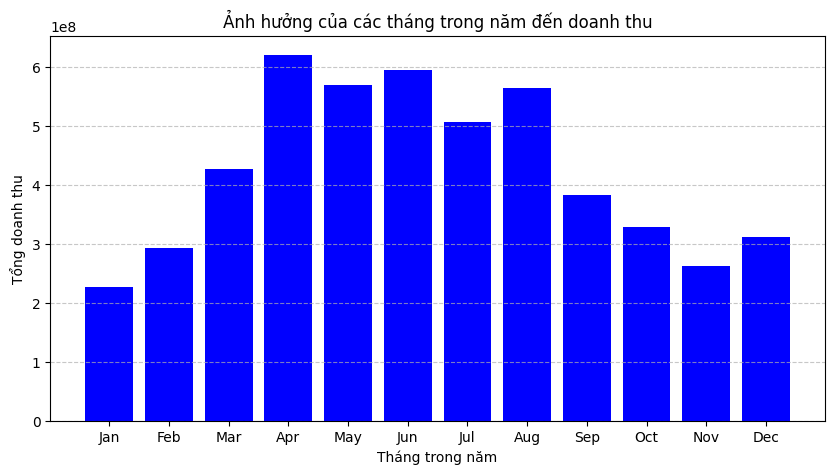

In [19]:
# Thêm cột "Month" để xác định tháng trong năm
df["Month"] = df["Date"].dt.month

# Tổng hợp doanh thu theo tháng
monthly_revenue = df.groupby("Month")["Revenue"].sum()

# Vẽ biểu đồ doanh thu theo tháng
plt.figure(figsize=(10, 5))
plt.bar(monthly_revenue.index, monthly_revenue.values, color='blue')
plt.xlabel("Tháng trong năm")
plt.ylabel("Tổng doanh thu")
plt.title("Ảnh hưởng của các tháng trong năm đến doanh thu")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Tổng doanh thu các tháng trong năm của từng khu vực

<Figure size 1200x600 with 0 Axes>

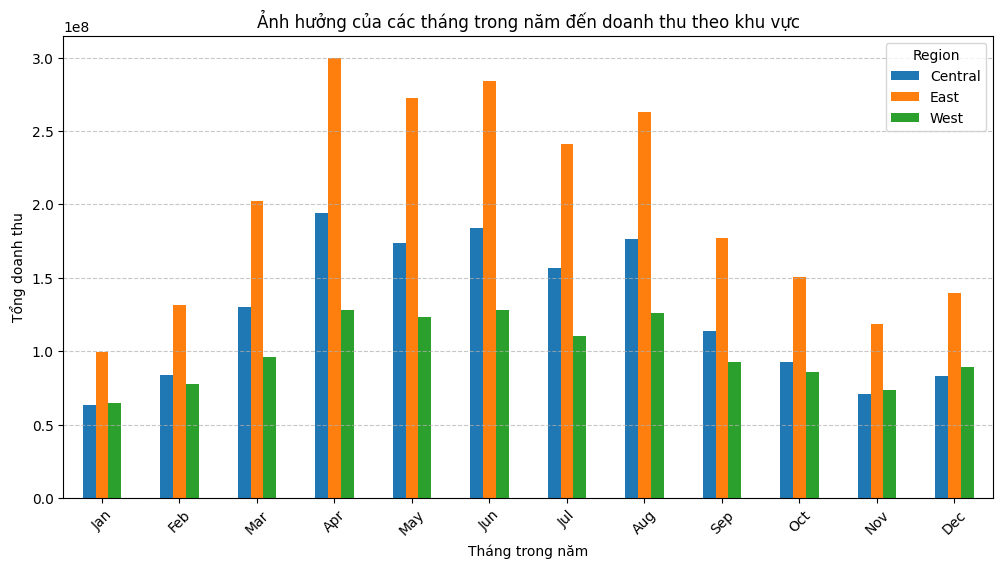

In [20]:
# Tổng hợp doanh thu theo tháng cho từng khu vực (Region)
monthly_revenue_region = df.groupby(["Month", "Region"])["Revenue"].sum().unstack()

# Vẽ biểu đồ doanh thu theo tháng cho từng khu vực
plt.figure(figsize=(12, 6))
monthly_revenue_region.plot(kind="bar", figsize=(12, 6))

# Thiết lập nhãn và tiêu đề
plt.xlabel("Tháng trong năm")
plt.ylabel("Tổng doanh thu")
plt.title("Ảnh hưởng của các tháng trong năm đến doanh thu theo khu vực")
plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.legend(title="Region")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Nhận xét:
- Tháng 4 và tháng 6 có doanh thu cao nhất, đặc biệt là khu vực East.
- Tháng 1, tháng 2, và tháng 11 có doanh thu thấp nhất.
- Đặc biệt, tất cả các vùng đều có mức doanh thu thấp hơn rõ rệt trong tháng 1. Điều này chứng tỏ mùa mua sắm chậm do sau kỳ nghỉ lễ lớn (Giáng sinh, Năm mới).

### Phân tích tiềm năng từ dữ liệu
📌 Chiến lược marketing & nhập hàng:
- Tăng cường nhập hàng vào tháng 3 – 6 và tháng 8, vì đây là thời gian doanh số cao.
- Chạy khuyến mãi vào tháng 1 & tháng 11 để kích thích nhu cầu mua sắm.

📌 Kiểm tra thêm yếu tố ảnh hưởng:
- Doanh thu cao vào mùa xuân & hè có thể liên quan đến các dịp giảm giá, sự kiện thời trang, hoặc lễ hội mùa hè.
- Doanh thu thấp vào đầu năm có thể do khách hàng chi tiêu ít hơn sau mùa lễ hội.

📌 Cơ hội tối ưu hóa doanh thu:
- Nếu biết tháng 4 & 6 là mùa cao điểm, có thể tăng giá nhẹ hoặc tối ưu chiến lược quảng cáo.
- Trong tháng thấp điểm (tháng 1, 2, 11), nên giảm giá mạnh hoặc tung ra sản phẩm mới để kích thích thị trường.

## 8. Tìm các sản phẩm bán ít mà doanh thu cao

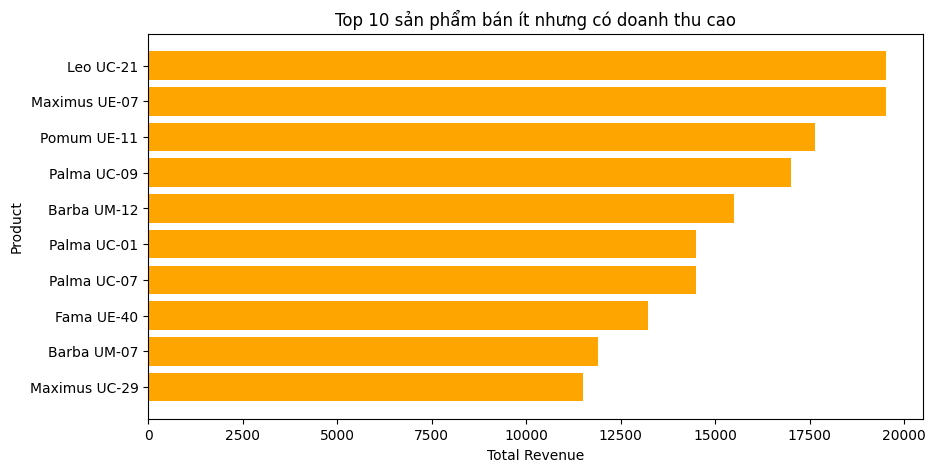

In [21]:
# Tính doanh thu trung bình mỗi đơn vị sản phẩm (Revenue per Unit)
df["Revenue per Unit"] = df["Revenue"] / df["Units"]

# Tìm sản phẩm bán ít nhưng doanh thu cao
low_sales_high_revenue = df.groupby("Product").agg(
    Total_Units=("Units", "sum"),
    Total_Revenue=("Revenue", "sum"),
    Revenue_per_Unit=("Revenue per Unit", "mean")
).sort_values(by=["Total_Units", "Total_Revenue"], ascending=[True, False])

# Lọc ra top 10 sản phẩm bán ít nhưng có doanh thu cao nhất
top_low_sales_high_revenue = low_sales_high_revenue.head(10)

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
plt.barh(top_low_sales_high_revenue.index, top_low_sales_high_revenue["Total_Revenue"], color='orange')
plt.xlabel("Total Revenue")
plt.ylabel("Product")
plt.title("Top 10 sản phẩm bán ít nhưng có doanh thu cao")
plt.gca().invert_yaxis()
plt.show()

## 9. So sánh độ biến động số lượng bán ra theo các vùng và theo sản phẩm

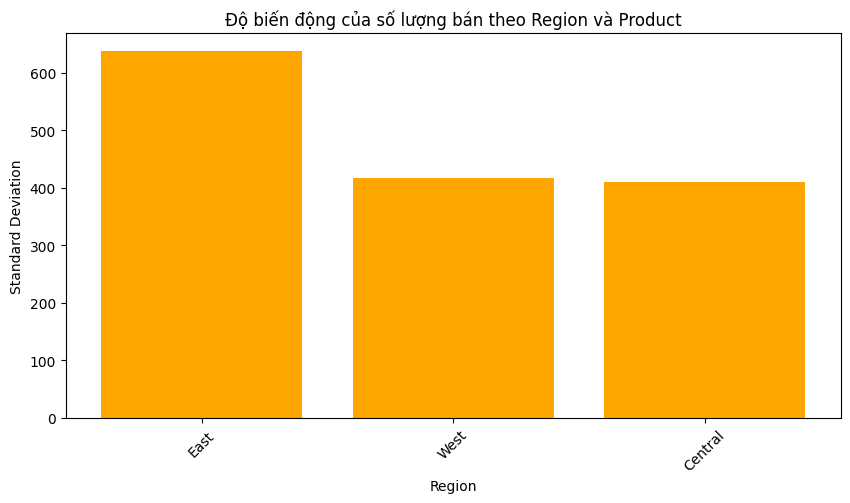

In [22]:
region_product_sales = df.groupby(["Region", "Product"])["Units"].sum().unstack()
region_variability = region_product_sales.std(axis=1).sort_values(ascending=False)

# Vẽ biểu đồ độ biến động của số lượng bán theo Region
plt.figure(figsize=(10, 5))
plt.bar(region_variability.index, region_variability.values, color='orange')
plt.xlabel("Region")
plt.ylabel("Standard Deviation")
plt.title("Độ biến động của số lượng bán theo Region và Product")
plt.xticks(rotation=45)
plt.show()

### Đánh giá
- Vùng East có độ biến động cao nhất. Sự chênh lệch về số lượng bán giữa các sản phẩm trong vùng này rất lớn: Một số sản phẩm có thể bán cực kỳ chạy, trong khi những sản phẩm khác bán rất ít.
- Vùng West và Central có độ biến động tương đương.

## 10. Phân tích sản phẩm Natura RP-79 là sản phẩm có doanh số bán được nhiều nhất

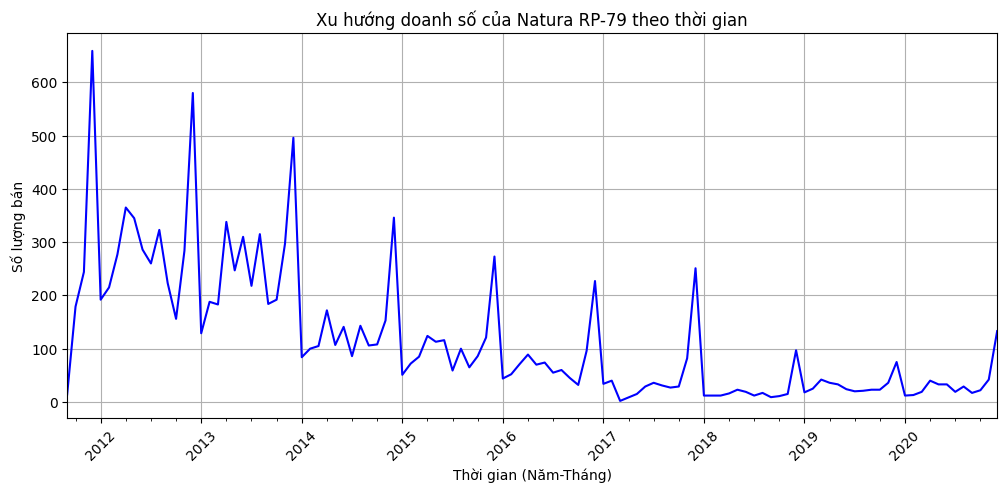

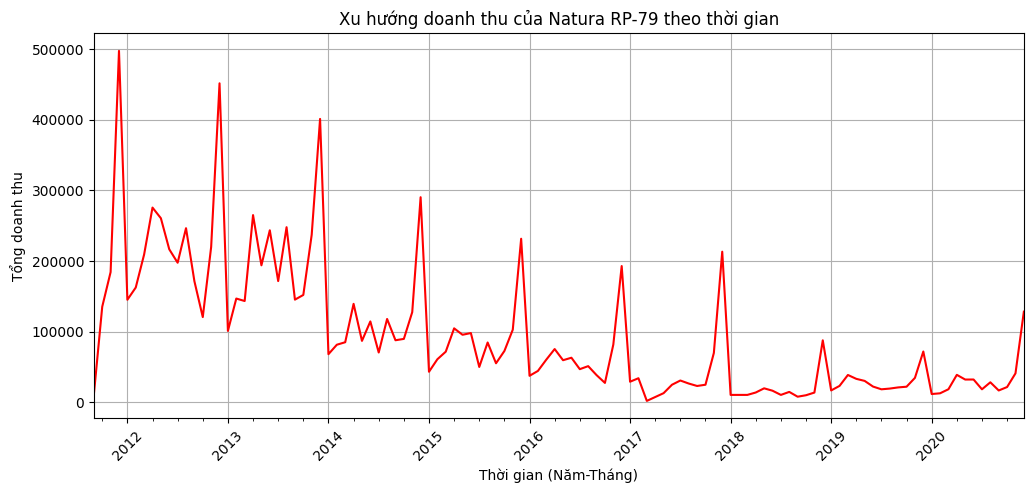

In [23]:
# Lọc dữ liệu cho sản phẩm "Natura RP-79"
natura_rp79_data = df[df["Product"] == "Natura RP-79"]

# Tổng hợp doanh số của sản phẩm theo từng khu vực
sales_by_region = natura_rp79_data.groupby("Region")["Units"].sum()

# Tổng doanh thu theo từng khu vực
revenue_by_region = natura_rp79_data.groupby("Region")["Revenue"].sum()

# Tổng hợp doanh số theo thời gian
sales_over_time = natura_rp79_data.groupby(df["Date"].dt.to_period("M"))["Units"].sum()

# Tổng hợp doanh thu theo thời gian
revenue_over_time = natura_rp79_data.groupby(df["Date"].dt.to_period("M"))["Revenue"].sum()

# Vẽ biểu đồ doanh số theo thời gian
plt.figure(figsize=(12, 5))
sales_over_time.plot(kind="line", color="blue")
plt.xlabel("Thời gian (Năm-Tháng)")
plt.ylabel("Số lượng bán")
plt.title("Xu hướng doanh số của Natura RP-79 theo thời gian")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Vẽ biểu đồ doanh thu theo thời gian
plt.figure(figsize=(12, 5))
revenue_over_time.plot(kind="line", color="red")
plt.xlabel("Thời gian (Năm-Tháng)")
plt.ylabel("Tổng doanh thu")
plt.title("Xu hướng doanh thu của Natura RP-79 theo thời gian")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


1️⃣ Nhận xét về xu hướng doanh số và doanh thu
🔹 Tổng quan:
- Sản phẩm Natura RP-79 từng đạt doanh thu và doanh số cao giai đoạn 2012 - 2014, sau đó giảm dần.
- Từ 2015 trở đi, doanh thu và số lượng bán hàng dao động mạnh, nhưng không duy trì được mức cao như trước đó.
- Xu hướng giảm dần theo thời gian, với một số đợt tăng đột biến vào từng thời điểm cụ thể.

📈 Xu hướng doanh thu (Biểu đồ 1 - Màu đỏ)
- Doanh thu cao nhất vào giai đoạn 2012 - 2014 nhưng giảm mạnh sau đó.
- Có các đỉnh tăng trưởng đột biến vào từng năm nhưng không kéo dài.
- Từ 2017 đến 2020, doanh thu rất thấp so với thời kỳ đầu, chỉ có một số tháng tăng đột ngột nhưng nhanh chóng giảm trở lại.

📦 Xu hướng số lượng bán ra (Biểu đồ 2 - Màu xanh)
- Số lượng bán cao vào các năm 2012 - 2014, nhưng sau đó giảm nhanh chóng.
- Có các đợt tăng đột biến theo chu kỳ, nhưng không duy trì ổn định.
- Trong những năm gần đây (2018 - 2020), sản phẩm bán được với số lượng rất thấp.

2️⃣ Định hướng chiến lược cho sản phẩm Natura RP-79

✅ Tại sao sản phẩm giảm doanh thu và doanh số?
- Có thể đã mất dần thị phần 📉
- Cần kiểm tra xem có sự thay đổi giá hay không.
- Không có chiến lược marketing hoặc sản phẩm bị thay thế 📢

🔹 Hướng đi chiến lược để phục hồi Natura RP-79

1️⃣ Xác định lại thị trường mục tiêu 🎯
- Kiểm tra xem khu vực nào vẫn còn nhu cầu → Tập trung tiếp thị tại những vùng này.
- Phân tích đối tượng khách hàng cũ và tìm cách tiếp cận lại họ.

2️⃣ Tạo chiến dịch khuyến mãi hoặc làm mới sản phẩm 💡
- Nếu giá quá cao, thử nghiệm chiến lược giảm giá có thời hạn để kích cầu.
- Nếu sản phẩm không còn thu hút, có thể tung phiên bản mới với một số cải tiến.

3️⃣ Tận dụng những giai đoạn doanh số đột biến 📊
- Có thể thấy một số tháng có doanh số cao hơn hẳn → Xác định lý do tại sao.
- Nếu doanh số tăng vào mùa đặc biệt, có thể tập trung marketing vào thời gian này.

4️⃣ Tìm hiểu nguyên nhân tăng đột biến trong từng năm 🕵️‍♂️
- Có sự kiện nào thúc đẩy doanh thu trong những tháng tăng đột biến không?
- Nếu có, hãy tái tạo những điều kiện đó để kích thích bán hàng.

### Theo 3 khu vực

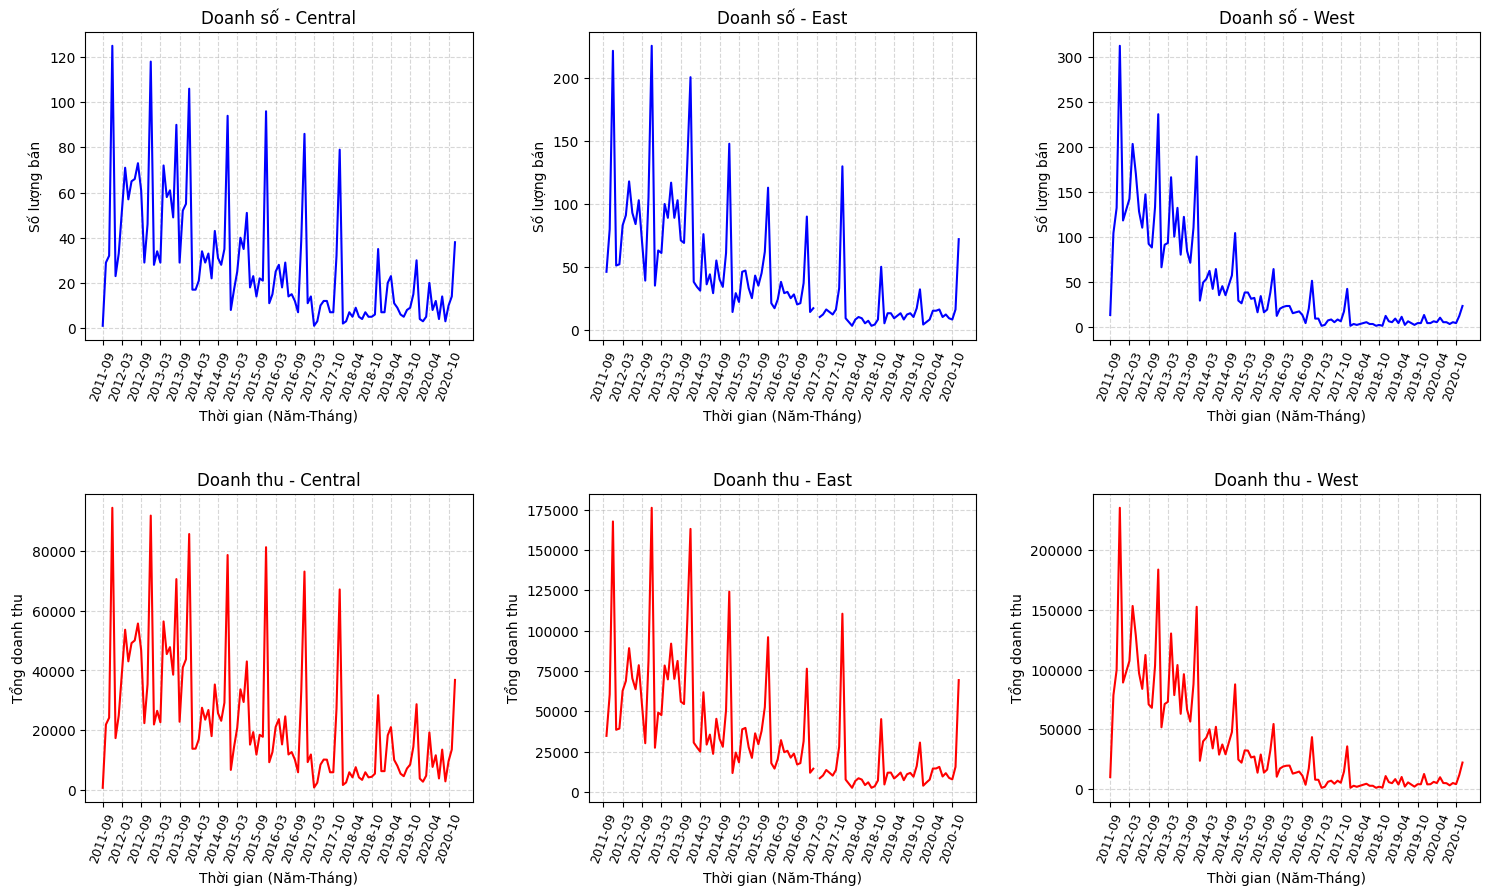

In [24]:
import matplotlib.pyplot as plt

# Lọc dữ liệu cho sản phẩm "Natura RP-79"
natura_rp79_data = df[df["Product"] == "Natura RP-79"]

# Tổng hợp số lượng bán theo thời gian và khu vực
sales_by_region_time = natura_rp79_data.groupby([df["Date"].dt.to_period("M"), "Region"])["Units"].sum().unstack()

# Tổng hợp doanh thu theo thời gian và khu vực
revenue_by_region_time = natura_rp79_data.groupby([df["Date"].dt.to_period("M"), "Region"])["Revenue"].sum().unstack()

# Chuyển đổi PeriodIndex thành string để vẽ
sales_by_region_time.index = sales_by_region_time.index.astype(str)
revenue_by_region_time.index = revenue_by_region_time.index.astype(str)

# Lấy danh sách các vùng (Region)
regions = sales_by_region_time.columns

# Tạo subplot (2 hàng, 3 cột) cho 6 biểu đồ
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Điều chỉnh khoảng cách giữa các subplot
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Xác định nhãn trục x (giảm số lượng nhãn để tránh chồng chéo)
xticks_indices = range(0, len(sales_by_region_time.index), 6)  # Hiển thị mỗi 6 tháng

# Vẽ biểu đồ doanh số theo thời gian (hàng đầu tiên)
for i, region in enumerate(regions):
    axes[0, i].plot(sales_by_region_time.index, sales_by_region_time[region], color="blue", linestyle="-")
    axes[0, i].set_title(f"Doanh số - {region}", fontsize=12)
    axes[0, i].set_xlabel("Thời gian (Năm-Tháng)", fontsize=10)
    axes[0, i].set_ylabel("Số lượng bán", fontsize=10)
    axes[0, i].set_xticks([sales_by_region_time.index[j] for j in xticks_indices])  # Giảm số lượng nhãn
    axes[0, i].tick_params(axis='x', rotation=70)  # Xoay nhãn
    axes[0, i].tick_params(axis='x', labelsize=9)
    axes[0, i].tick_params(axis='y', labelsize=10)
    axes[0, i].grid(True, linestyle="--", alpha=0.5)

# Vẽ biểu đồ doanh thu theo thời gian (hàng thứ hai)
for i, region in enumerate(regions):
    axes[1, i].plot(revenue_by_region_time.index, revenue_by_region_time[region], color="red", linestyle="-")
    axes[1, i].set_title(f"Doanh thu - {region}", fontsize=12)
    axes[1, i].set_xlabel("Thời gian (Năm-Tháng)", fontsize=10)
    axes[1, i].set_ylabel("Tổng doanh thu", fontsize=10)
    axes[1, i].set_xticks([revenue_by_region_time.index[j] for j in xticks_indices])  # Giảm số lượng nhãn
    axes[1, i].tick_params(axis='x', rotation=70)  # Xoay nhãn
    axes[1, i].tick_params(axis='x', labelsize=9)
    axes[1, i].tick_params(axis='y', labelsize=10)
    axes[1, i].grid(True, linestyle="--", alpha=0.5)

# Hiển thị biểu đồ
plt.show()


### Đánh giá
1️⃣  Xu hướng:
- Cả doanh số và doanh thu có xu hướng giảm dần theo thời gian trong tất cả các vùng.
- Giai đoạn đầu (2011-2014) có doanh số cao, sau đó dần suy giảm đến cuối khoảng thời gian phân tích.
- Biến động mạnh trong giai đoạn đầu, sau đó trở nên ổn định hơn với mức doanh số và doanh thu thấp hơn.

💡Kết luận: Sản phẩm "Natura RP-79" có thể đã từng rất phổ biến nhưng dần bị giảm sức hút trên thị trường.

2️⃣ So sánh giữa các vùng:
- `West` có thể từng là thị trường quan trọng nhất nhưng hiện tại đã không còn duy trì sức bán.
- `East` có biến động nhẹ hơn, có thể vẫn còn tiềm năng nhưng không đáng kể.
- `Central` chưa bao giờ là thị trường mạnh, và doanh số cũng đang giảm tương tự.

3️⃣ Biến động doanh số và doanh thu
- Có sự dao động lớn trong giai đoạn đầu (2011-2014), đặc biệt là doanh thu có nhiều đỉnh cao.
- Từ 2015 trở đi, mức độ dao động giảm dần, cho thấy thị trường đã ổn định nhưng ở mức thấp.
- Những đợt tăng đột biến (spikes) có thể liên quan đến chiến dịch khuyến mãi hoặc nhu cầu theo mùa.

4️⃣ Đề xuất chiến lược

📌 Nếu muốn tiếp tục kinh doanh sản phẩm này:
- Xem xét chiến dịch giảm giá hoặc marketing lại sản phẩm để thu hút khách hàng cũ.
- Tập trung vào vùng East hơn vùng West, vì vẫn có một số biến động doanh số.
- Phân tích nguyên nhân mất thị phần (xu hướng thị trường, đối thủ cạnh tranh, sự thay đổi của khách hàng).

📌 Nếu muốn thay thế sản phẩm:
- Xác định sản phẩm thay thế phù hợp dựa trên xu hướng hiện tại.
- Dừng nhập hàng vào West & Central nếu không có chiến dịch cải thiện.
- Dựa vào phân tích này, có thể cân nhắc tập trung vào sản phẩm khác với tiềm năng cao hơn.

## 11. Phân tích 10 sản phẩm được bán chạy nhất

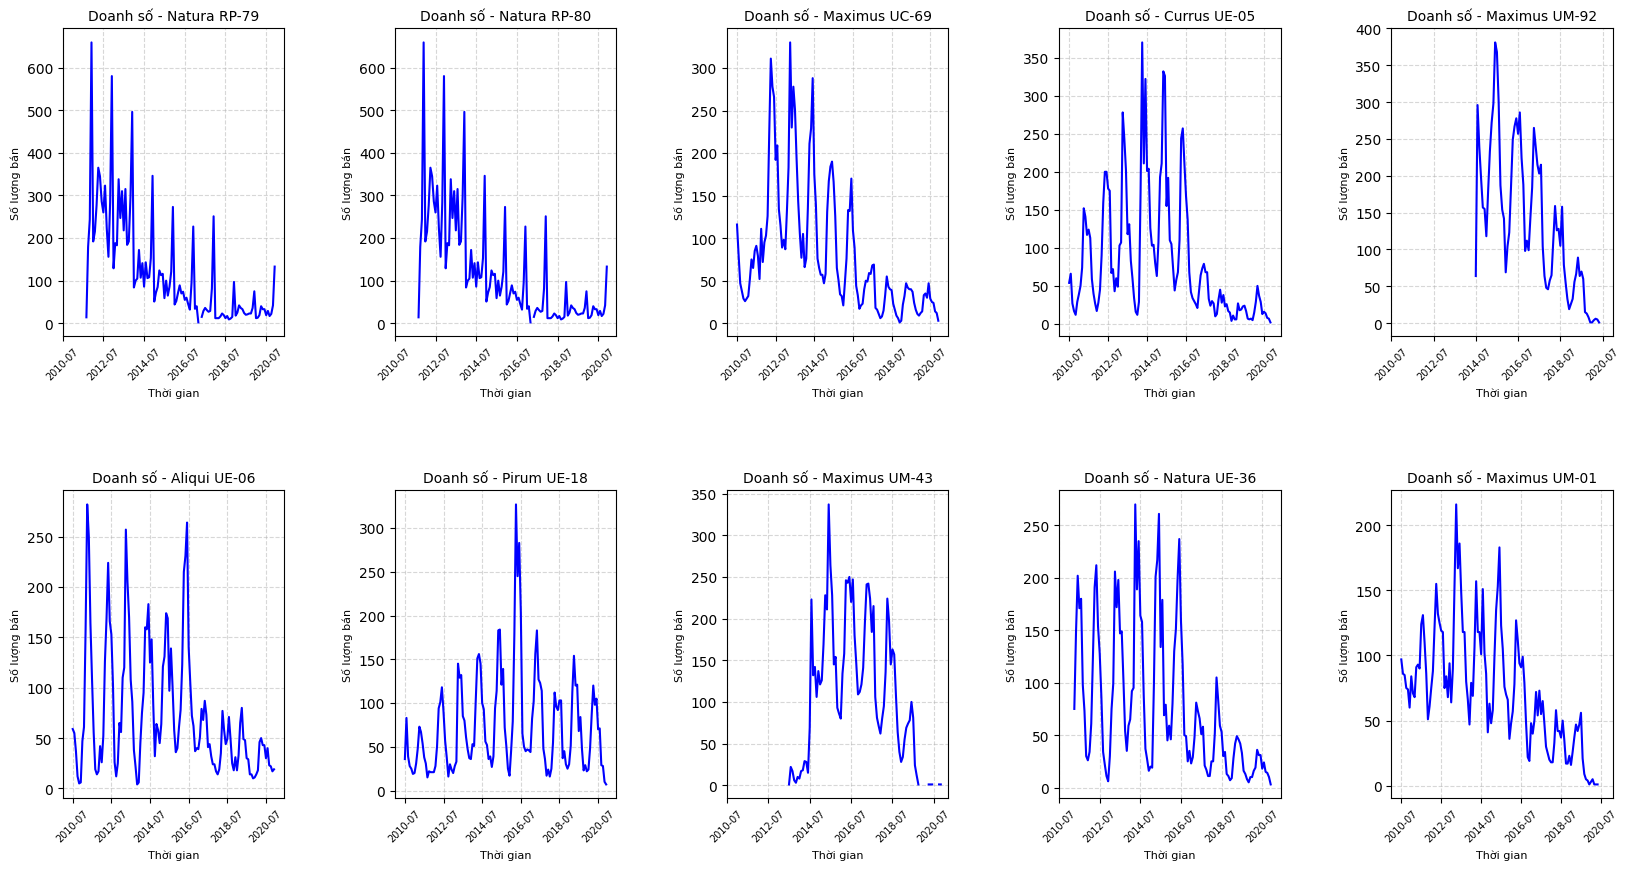

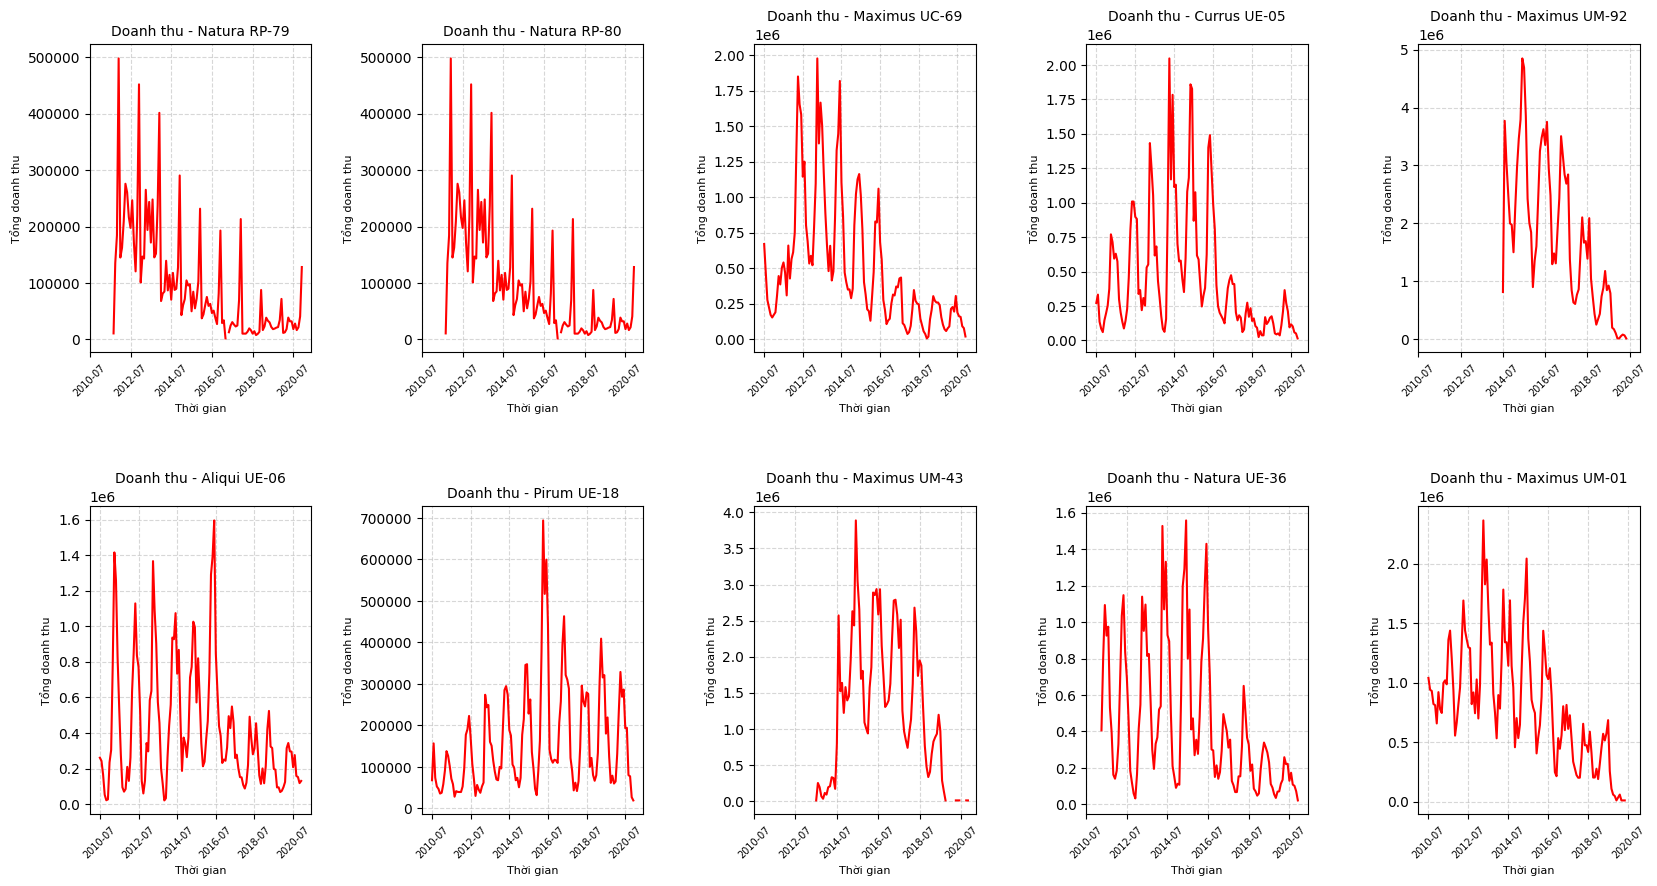

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Danh sách 10 sản phẩm bán chạy nhất
top_10_products = [
    "Natura RP-79", "Natura RP-80", "Maximus UC-69", "Currus UE-05", "Maximus UM-92",
    "Aliqui UE-06", "Pirum UE-18", "Maximus UM-43", "Natura UE-36", "Maximus UM-01"
]

# Lọc dữ liệu cho 10 sản phẩm này
top_products_data = df[df["Product"].isin(top_10_products)]

# Tổng hợp số lượng bán theo thời gian (tháng) cho từng sản phẩm
sales_over_time = top_products_data.groupby([df["Date"].dt.to_period("M"), "Product"])["Units"].sum().unstack()

# Tổng hợp doanh thu theo thời gian (tháng) cho từng sản phẩm
revenue_over_time = top_products_data.groupby([df["Date"].dt.to_period("M"), "Product"])["Revenue"].sum().unstack()

# Chuyển index về dạng string để vẽ dễ hơn
sales_over_time.index = sales_over_time.index.astype(str)
revenue_over_time.index = revenue_over_time.index.astype(str)

# Giảm số lượng nhãn trên trục x, chỉ hiển thị mỗi 2 năm một lần
tick_interval = 24  # Hiển thị mỗi 24 tháng (2 năm)
selected_ticks = sales_over_time.index[::tick_interval]

# Số lượng hàng và cột cho subplot
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Vẽ biểu đồ doanh số theo thời gian (1 ảnh)
for i, product in enumerate(top_10_products):
    row, col = divmod(i, 5)  # Chia thành 2 hàng, 5 cột
    axes[row, col].plot(sales_over_time.index, sales_over_time[product], color="blue", linestyle="-")
    axes[row, col].set_title(f"Doanh số - {product}", fontsize=10)
    axes[row, col].set_xlabel("Thời gian", fontsize=8)
    axes[row, col].set_ylabel("Số lượng bán", fontsize=8)
    axes[row, col].set_xticks(selected_ticks)
    axes[row, col].set_xticklabels(selected_ticks, rotation=45, fontsize=7)
    axes[row, col].grid(True, linestyle="--", alpha=0.5)

plt.show()

# Tạo figure mới cho doanh thu
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Vẽ biểu đồ doanh thu theo thời gian (ảnh thứ 2)
for i, product in enumerate(top_10_products):
    row, col = divmod(i, 5)
    axes[row, col].plot(revenue_over_time.index, revenue_over_time[product], color="red", linestyle="-")
    axes[row, col].set_title(f"Doanh thu - {product}", fontsize=10)
    axes[row, col].set_xlabel("Thời gian", fontsize=8)
    axes[row, col].set_ylabel("Tổng doanh thu", fontsize=8)
    axes[row, col].set_xticks(selected_ticks)
    axes[row, col].set_xticklabels(selected_ticks, rotation=45, fontsize=7)
    axes[row, col].grid(True, linestyle="--", alpha=0.5)

plt.show()


## 12. Đánh giá sự thay đổi phương sai

### Tỷ lệ doanh thu trên số sản phẩm theo từng năm

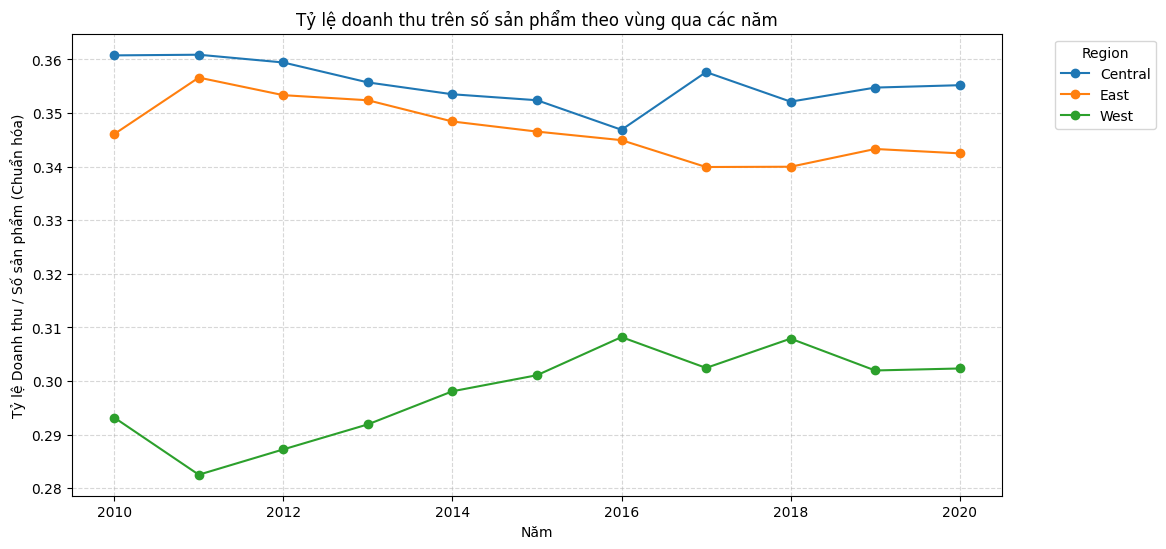

In [26]:
# Tính tỷ lệ doanh thu trên số sản phẩm bán ra cho từng vùng theo từng năm
df["Year"] = df["Date"].dt.year  # Thêm cột năm để nhóm dữ liệu

# Tính tổng doanh thu và tổng số sản phẩm bán ra theo năm và vùng
yearly_revenue = df.groupby(["Year", "Region"])["Revenue"].sum()
yearly_units = df.groupby(["Year", "Region"])["Units"].sum()

# Tính tỷ lệ doanh thu trên số sản phẩm
revenue_per_unit_by_region = yearly_revenue / yearly_units

# Chuẩn hóa theo tổng số trên toàn bộ vùng (tính tỷ lệ so với toàn bộ)
total_revenue_per_unit_by_year = revenue_per_unit_by_region.groupby("Year").sum()
normalized_revenue_per_unit = revenue_per_unit_by_region / total_revenue_per_unit_by_year

# Chuyển đổi về dạng DataFrame để dễ xử lý
normalized_revenue_per_unit_df = normalized_revenue_per_unit.unstack()

# Vẽ biểu đồ tỷ lệ doanh thu trên số sản phẩm theo từng năm
plt.figure(figsize=(12, 6))
normalized_revenue_per_unit_df.plot(kind="line", marker="o", ax=plt.gca())
plt.xlabel("Năm")
plt.ylabel("Tỷ lệ Doanh thu / Số sản phẩm (Chuẩn hóa)")
plt.title("Tỷ lệ doanh thu trên số sản phẩm theo vùng qua các năm")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


| **Vùng**   | **Xu hướng**                                                       | **Nhận xét**                                                               |
|------------|---------------------------------------------------------------------|----------------------------------------------------------------------------|
| **Central** | Duy trì tỷ lệ cao nhất, nhưng có sự giảm nhẹ giai đoạn 2013-2016, sau đó hồi phục. | Thị trường Central có thể có chiến lược định giá cao hơn, sản phẩm bán ra có giá trị lớn. |
| **East**    | Tăng mạnh 2010-2011, sau đó giảm dần đến 2017 rồi ổn định.         | Có thể là do cạnh tranh giá hoặc thay đổi trong sản phẩm bán ra.            |
| **West**    | Tỷ lệ thấp nhất nhưng có xu hướng tăng 2011-2016, sau đó dao động nhẹ. | Giá trị trung bình trên mỗi sản phẩm có thể được điều chỉnh dần theo xu hướng thị trường. |


### Tính sự thay đổi phương sai của tỷ lệ doanh thu/số sản phẩm theo từng năm

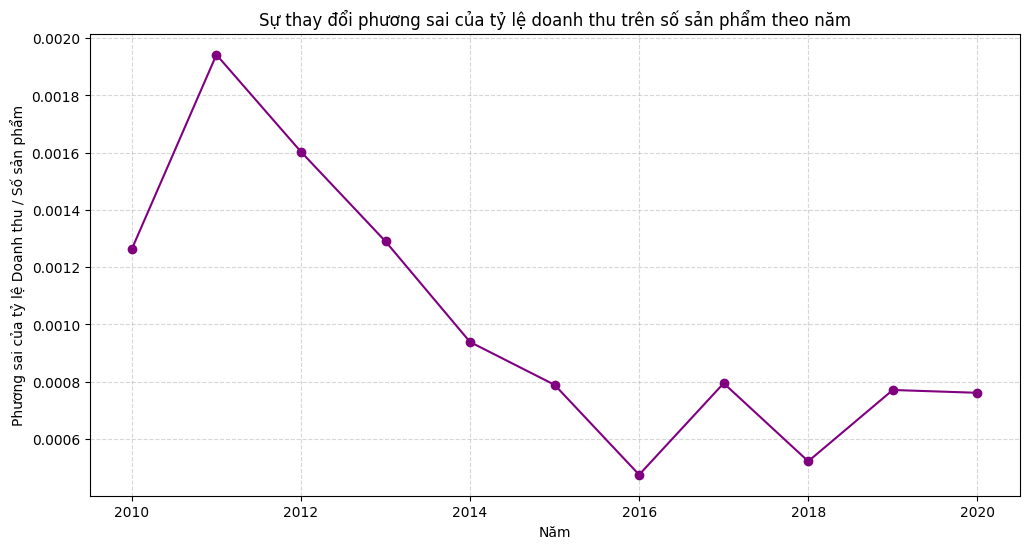

In [27]:
# Tính phương sai theo từng năm để đánh giá sự thay đổi
variance_by_year = normalized_revenue_per_unit_df.var(axis=1)

# Vẽ biểu đồ thể hiện sự thay đổi phương sai qua các năm
plt.figure(figsize=(12, 6))
plt.plot(variance_by_year.index, variance_by_year.values, marker="o", linestyle="-", color="purple")
plt.xlabel("Năm")
plt.ylabel("Phương sai của tỷ lệ Doanh thu / Số sản phẩm")
plt.title("Sự thay đổi phương sai của tỷ lệ doanh thu trên số sản phẩm theo năm")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

💡 Nhận xét theo giai đoạn:
- Giai đoạn 2010-2012: Thị trường chưa ổn định, các vùng có thể áp dụng chiến lược giá khác nhau.
- Giai đoạn 2012-2016: Sự khác biệt giá giữa các vùng giảm dần, có thể do cạnh tranh mạnh hơn hoặc sự đồng bộ trong chính sách giá.
- Giai đoạn 2016-2020: Thị trường trở nên ổn định, không có sự chênh lệch lớn giữa các vùng.

💡 Ý nghĩa kinh doanh
- Sự suy giảm phương sai cho thấy chiến lược giá đang trở nên đồng nhất giữa các vùng.
- Nếu muốn khai thác thị trường, có thể cần tập trung vào các yếu tố khác ngoài giá cả (chất lượng, dịch vụ,...).
- Nếu muốn tăng lợi nhuận, có thể xem xét phân khúc khách hàng thay vì áp dụng mức giá đồng đều cho tất cả các vùng.

## 13. Xu hướng doanh thu, doanh số, giá vốn, lợi nhuận của từng vùng thay đổi theo tháng, quý, năm.

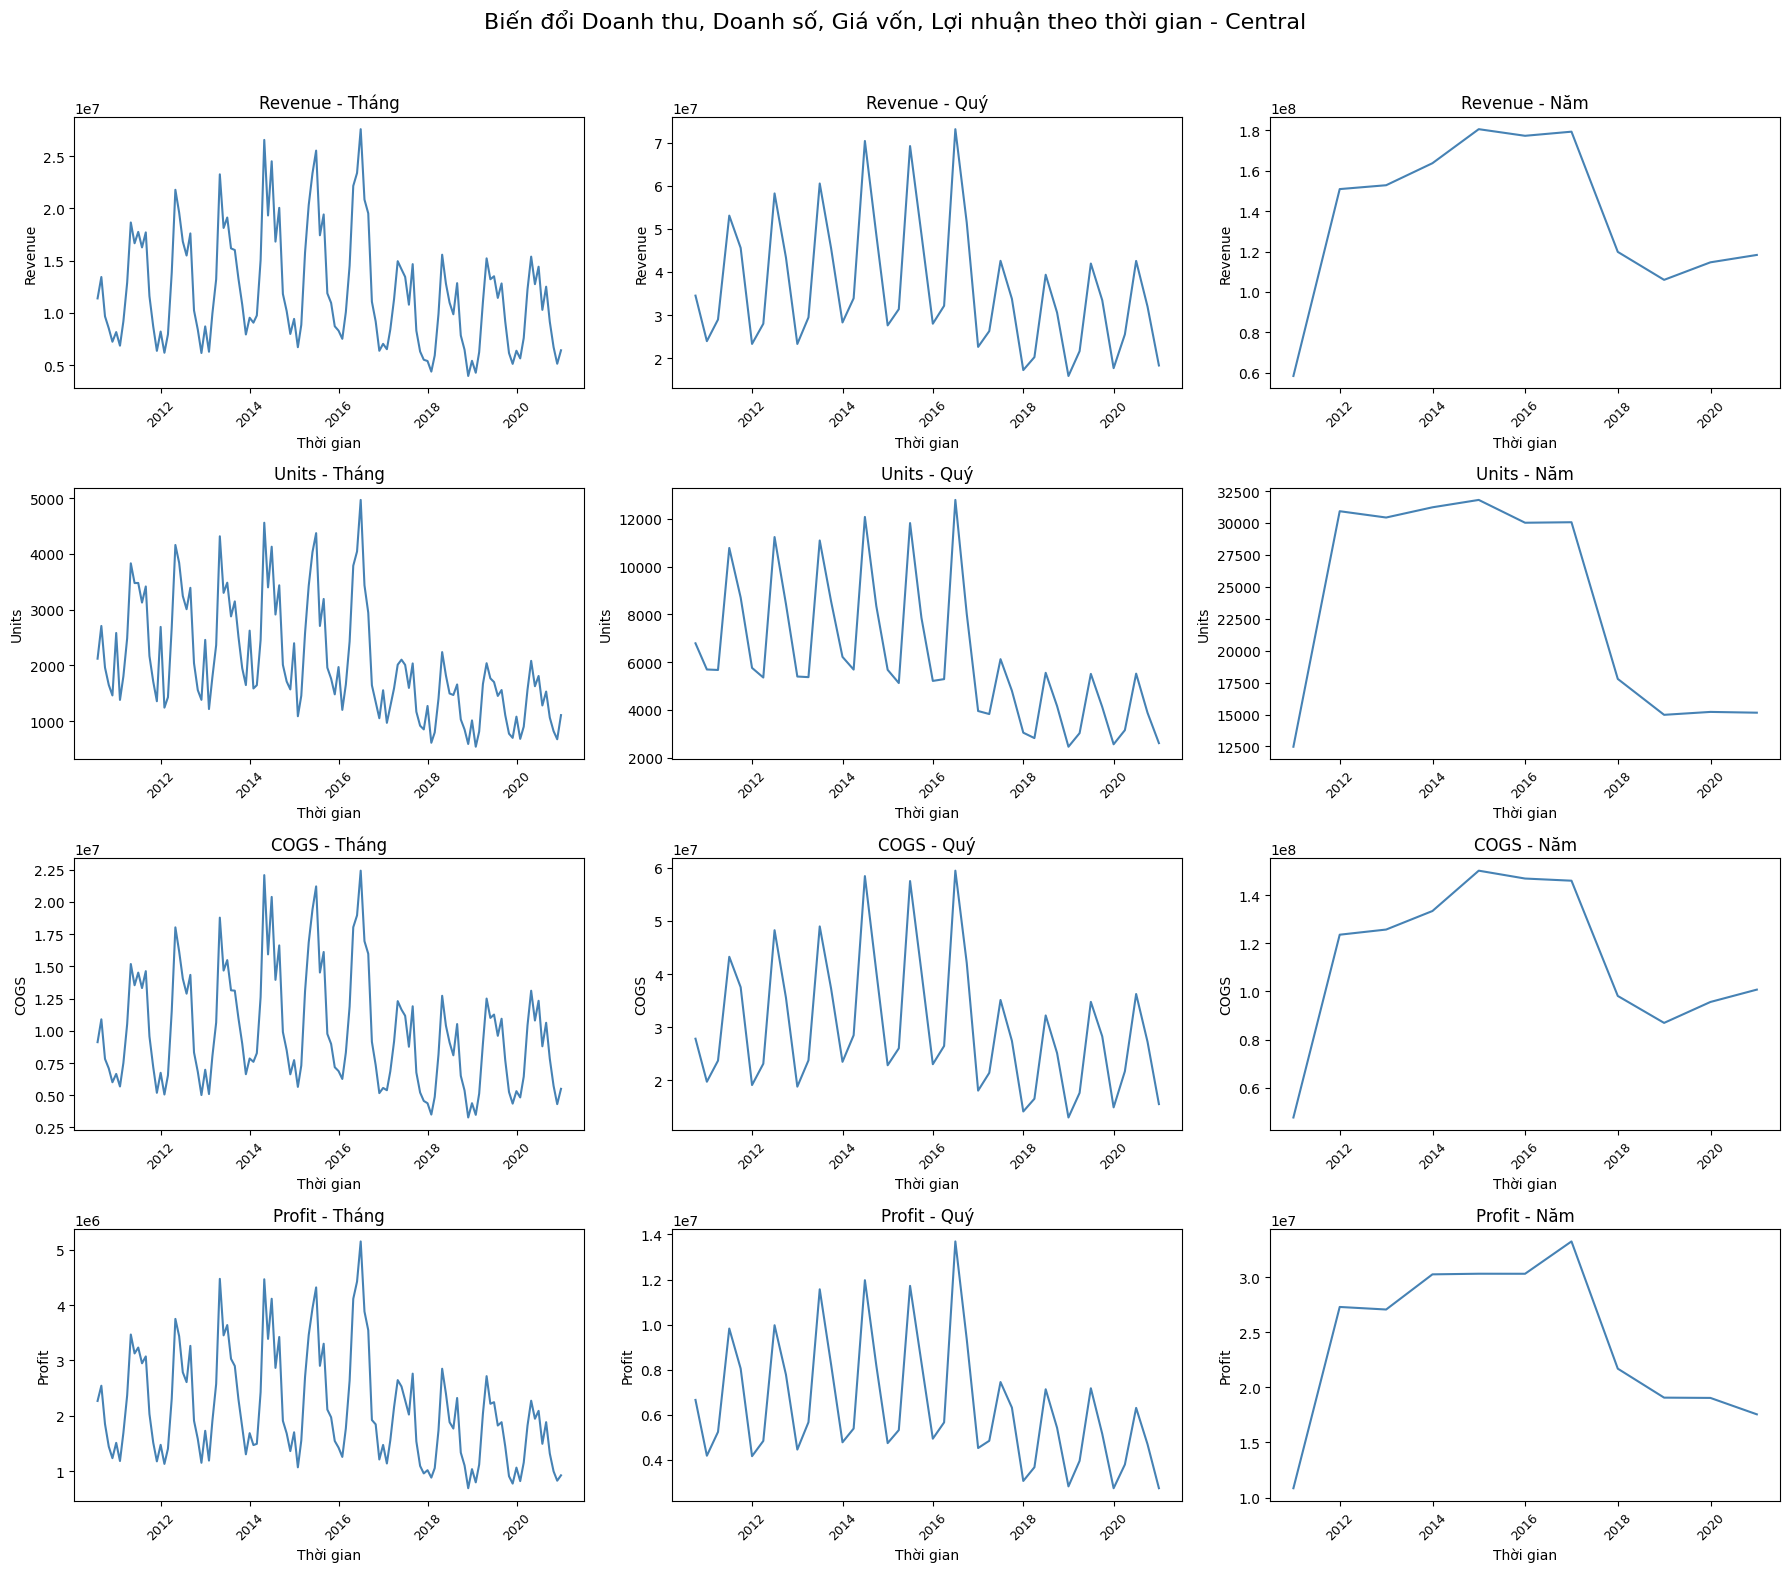

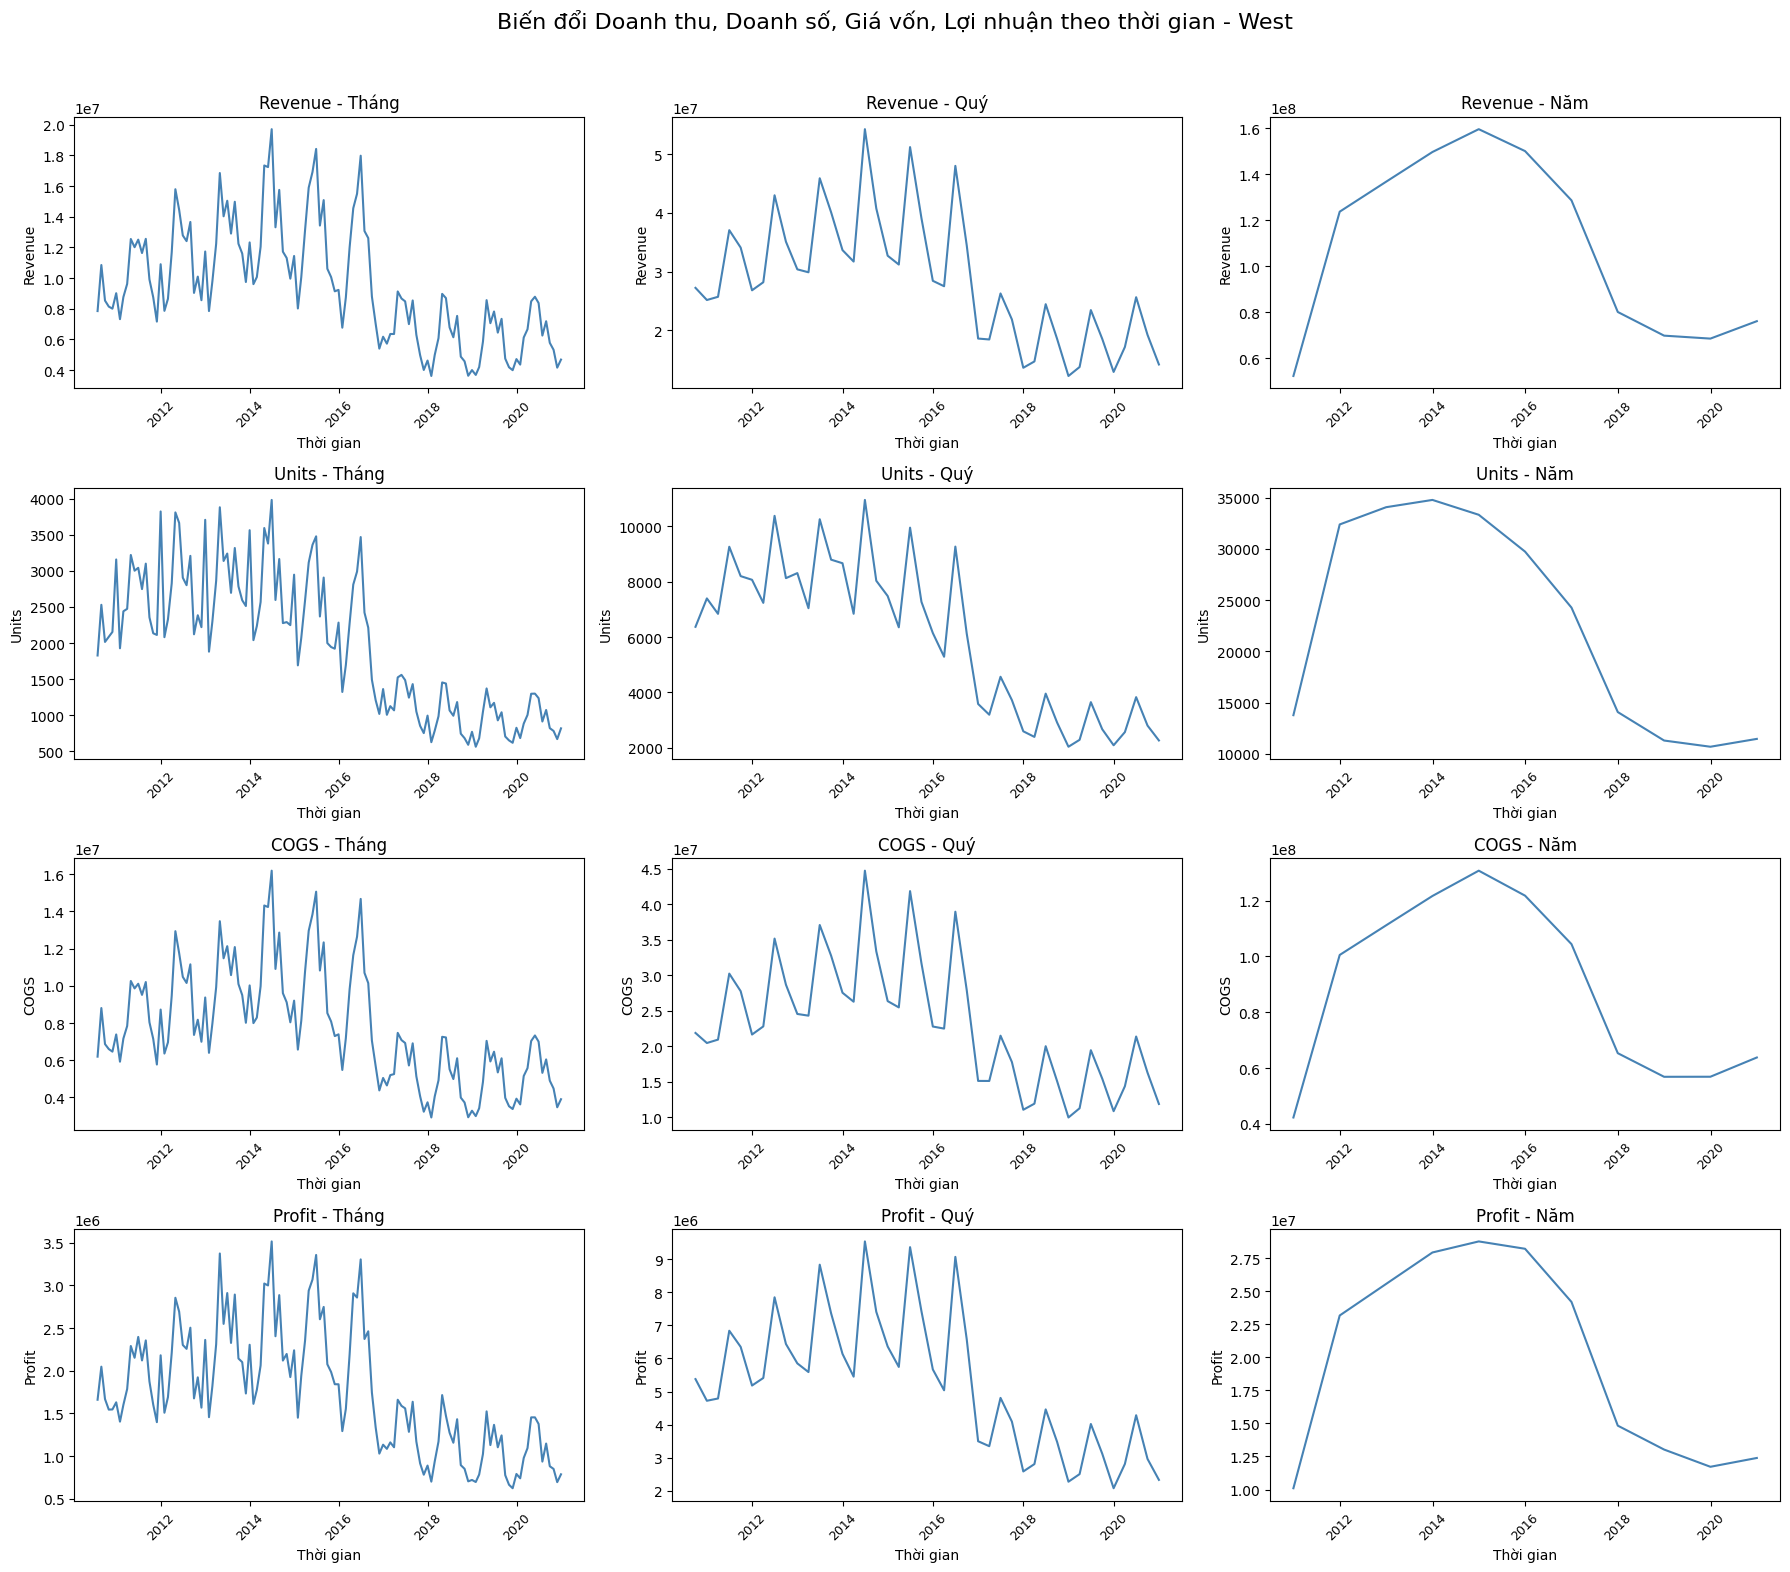

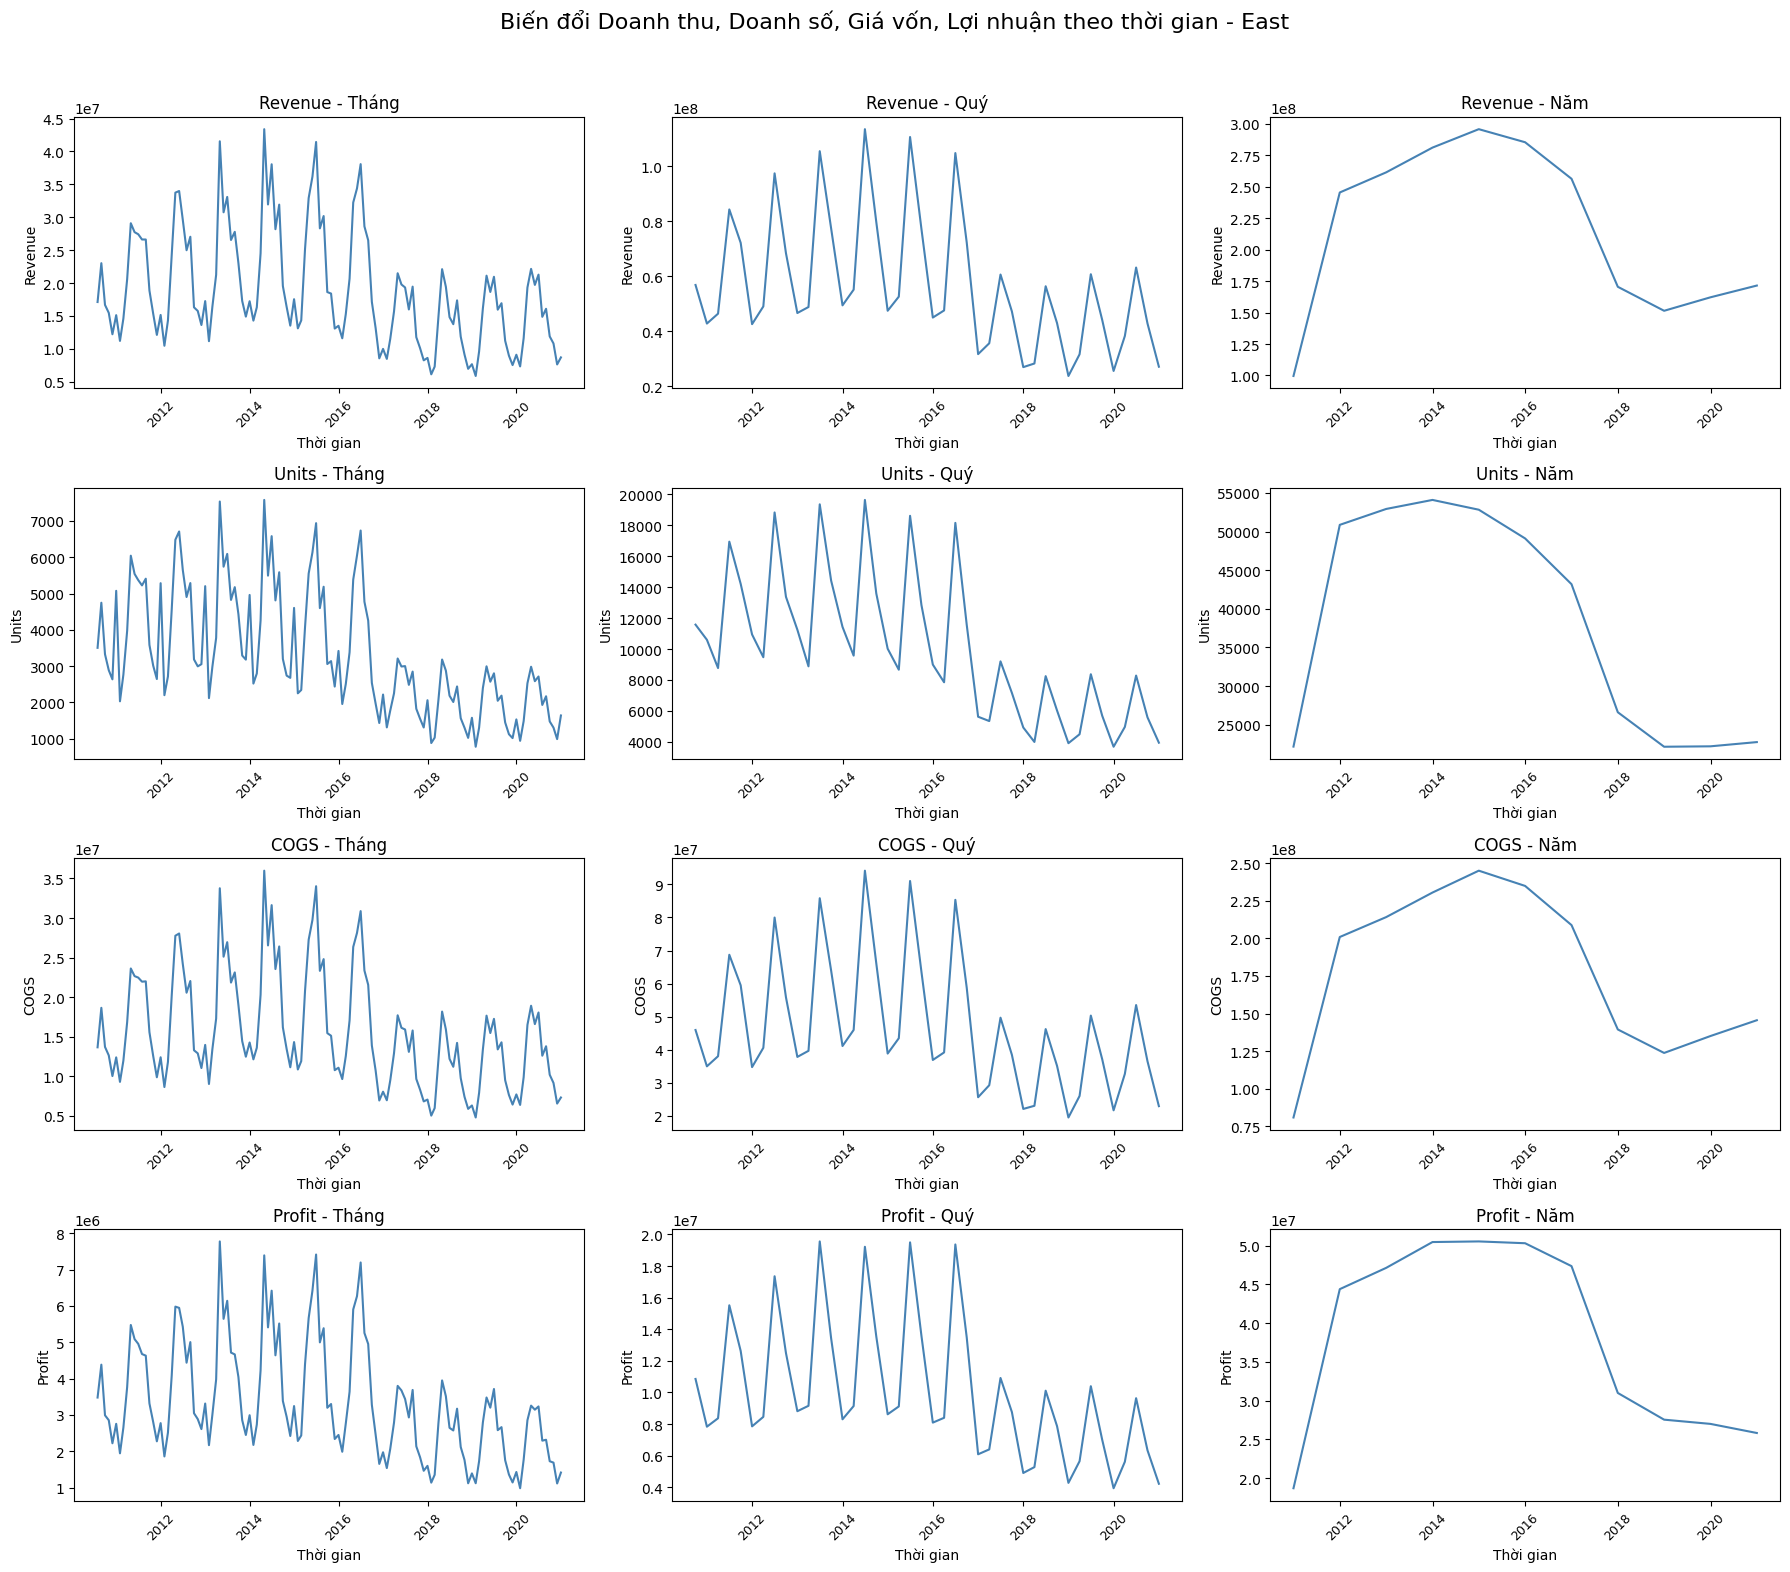

In [28]:
from dataflow import df_train, df_test, df_geography, df_product
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# Tắt cảnh báo (nếu có)
warnings.filterwarnings('ignore')

# Gộp dữ liệu: kết nối bảng train, geography và product dựa theo Zip và ProductID
df = df_train.merge(df_geography, on='Zip', how='left')\
             .merge(df_product, on='ProductID', how='left')

# Tính thêm cột Lợi nhuận
df['Profit'] = df['Revenue'] - df['COGS']

# Lấy danh sách các vùng
regions = df['Region'].unique()

# Hàm tổng hợp dữ liệu theo tần số (tháng: 'M', quý: 'Q', năm: 'Y')
def aggregate_data(df_region, freq):
    # Đảm bảo cột Date ở định dạng datetime
    df_region['Date'] = pd.to_datetime(df_region['Date'])
    # Đặt cột Date làm index và sắp xếp theo thời gian
    df_region = df_region.set_index('Date').sort_index()
    # Nếu index ở dạng PeriodIndex, chuyển đổi về datetime
    if isinstance(df_region.index, pd.PeriodIndex):
        df_region.index = df_region.index.to_timestamp()
    # Tổng hợp các giá trị theo khoảng thời gian
    agg = df_region.resample(freq).sum()[['Revenue', 'Units', 'COGS', 'Profit']].reset_index()
    return agg

# Lặp qua từng vùng để vẽ đồ thị
for region in regions:
    # Lấy dữ liệu cho vùng cụ thể
    df_region = df[df['Region'] == region].copy()
    
    # Tổng hợp theo từng mức thời gian: Tháng, Quý, Năm
    monthly_data   = aggregate_data(df_region.copy(), 'M')
    quarterly_data = aggregate_data(df_region.copy(), 'Q')
    yearly_data    = aggregate_data(df_region.copy(), 'Y')
    
    # Tạo figure với 4 hàng (metrics) x 3 cột (thời gian)
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16), sharex=False)
    fig.suptitle(f'Biến đổi Doanh thu, Doanh số, Giá vốn, Lợi nhuận theo thời gian - {region}', fontsize=16)
    
    # Danh sách các metric và tiêu đề của từng cột
    metrics = ['Revenue', 'Units', 'COGS', 'Profit']
    period_titles = ['Tháng', 'Quý', 'Năm']
    datasets = [monthly_data, quarterly_data, yearly_data]
    
    # Vẽ từng subplot: hàng ứng với metric, cột ứng với tần số thời gian
    for i, metric in enumerate(metrics):
        for j, (data, period) in enumerate(zip(datasets, period_titles)):
            ax = axes[i, j]
            ax.plot(data['Date'], data[metric], linestyle='-', color='steelblue')
            ax.set_title(f'{metric} - {period}', fontsize=12)
            ax.set_xlabel('Thời gian', fontsize=10)
            ax.set_ylabel(metric, fontsize=10)
            ax.tick_params(axis='x', labelrotation=45, labelsize=9)
    
    # Điều chỉnh layout cho gọn và hiển thị đồ thị
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

### Nhận xét theo cấu trúc biểu đồ:
a, Tháng (M):
- Các đường biểu diễn thể hiện chi tiết biến động theo từng tháng, quan sát rõ được các gợn sóng ngắn hạn, dễ thấy được yếu tố mùa vụ (nếu có).
- Thường thấy các đỉnh (peak) và đáy (trough) lặp lại theo chu kỳ năm.

b, Quý (Q):
- Khi dữ liệu được gộp theo quý, số điểm dữ liệu ít hơn, đường biểu diễn trông “mượt” hơn.
- Vẫn có thể thấy xu hướng tăng/giảm trong năm, nhưng chi tiết dao động hàng tháng được gộp lại.

c, Năm (Y):
- Đường biểu diễn theo năm thường có rất ít điểm (tương ứng số năm dữ liệu).
- Đây là mức tổng hợp cao nhất, giúp nhìn xu hướng dài hạn (tăng/giảm theo năm) nhưng khó thấy chi tiết biến động ngắn hạn.

### Nhận xét về các chỉ số:
a, Revenue (Doanh thu)
- Ở dạng tháng, biểu đồ có dạng sóng khá rõ, thể hiện có mùa vụ (một số tháng cao, một số tháng thấp).
- Ở dạng quý và năm, có thể thấy xu hướng tăng dần đến một mức nào đó rồi giảm (tùy theo từng vùng).
- So sánh East, West, Central: Mức doanh thu (scale) có thể khác nhau. Ví dụ, vùng East có thể cao hơn West hay Central (hoặc ngược lại). Xu hướng theo năm cũng có thể khác nhau (có vùng lên, có vùng xuống).

b, Units (Doanh số)
- Tương tự Revenue, nhưng biên độ dao động (khoảng chênh lệch giữa đỉnh và đáy) có thể khác.
- Nếu có tháng/quý/năm nào đó bùng nổ về số lượng bán ra, nó sẽ thể hiện rõ ở dạng tháng.
- So sánh giữa vùng: có thể vùng nào dân cư đông hơn hay có ưu thế thị trường sẽ bán nhiều Units hơn.

c, COGS (Giá vốn)
- Cũng có thể có mùa vụ, nhất là khi liên quan trực tiếp đến sản lượng bán (nhiều đơn vị bán ra thì giá vốn cũng cao).
- Ở dạng năm, có thể thấy tổng COGS tăng dần đến một điểm, sau đó giảm (nếu Revenue giảm).

d, Profit (Lợi nhuận)
- Profit = Revenue - COGS. Nếu Revenue và COGS biến động mạnh, Profit có thể lên xuống nhanh hơn.
- Quan sát ở dạng tháng giúp thấy tháng nào lãi cao, tháng nào thấp (hoặc thậm chí âm).
- Ở dạng năm, Profit thường thể hiện xu hướng tổng thể (có năm lãi cao, có năm sụt giảm).

### So sánh East, West, Central:
a, East:
- Có thể thấy Revenue, Units, Profit theo tháng dao động mạnh, cho thấy vùng này có thể có mùa vụ rõ.
- Xu hướng theo năm có thể tăng rồi giảm, tùy thuộc vào giai đoạn cuối (cần xem số năm có đủ nhiều không).

b, West:
- Nếu biểu đồ West có biên độ thấp hơn hoặc cao hơn East, chứng tỏ quy mô thị trường khác biệt.
- Profit có thể tương đối bám sát Revenue (nếu COGS không biến động quá nhiều).

c, Central:
- Quan sát xem Central có biên độ biến động ít hơn (ổn định) hay mạnh hơn so với East/West.
- Nếu Profit giảm về cuối biểu đồ năm, có thể do Revenue giảm nhanh hơn COGS, hoặc do chi phí tăng.

### Một số điểm chung có thể rút ra:
a, Tính mùa vụ:
- Dễ thấy nhất ở dạng tháng: các đỉnh/đáy lặp lại, cho thấy có thể có mùa cao điểm (peak season) và mùa thấp điểm (off-season).

b, Xu hướng (trend):
- Ở dạng năm, nhiều vùng có xu hướng tăng mạnh giai đoạn đầu, rồi đi ngang hoặc giảm về sau.
- Điều này gợi ý có thể thị trường đã đạt đỉnh, hoặc có sự thay đổi chiến lược kinh doanh, hoặc yếu tố kinh tế vĩ mô.

c, So sánh các vùng:
- Nếu East có mức Revenue và Profit cao hơn West và Central, ta có thể suy luận East là thị trường trọng điểm.
- Nếu West có Profit giảm mạnh cuối chuỗi, cần xem lại chi phí hay giá bán.
- Central có thể ổn định hoặc dao động tùy dữ liệu thực tế.

d, Hàm ý quản trị:
- Dựa trên mùa vụ, doanh nghiệp có thể lên kế hoạch tồn kho, marketing, khuyến mãi tập trung vào các tháng/quý cao điểm.
- Quan sát xu hướng lợi nhuận (Profit) để điều chỉnh chi phí, giá bán, hoặc thay đổi chiến lược sản phẩm.

### Kết luận
- Các biểu đồ cho thấy rõ ràng biến động theo tháng/quý/năm của 4 chỉ số chính (Doanh thu, Doanh số, Giá vốn, Lợi nhuận) ở 3 vùng.
- Mùa vụ và xu hướng dài hạn (đặc biệt là dạng năm) là hai khía cạnh quan trọng nhất rút ra từ chuỗi dữ liệu này.
- Sự khác biệt về biên độ và xu hướng giữa East, West, Central gợi ý rằng mỗi vùng có đặc thù thị trường riêng, cần chiến lược quản lý và dự báo riêng.

## 14. Ma trận tương quan về doanh thu, doanh số, giá vốn, lợi nhuận giữa các cặp vùng.

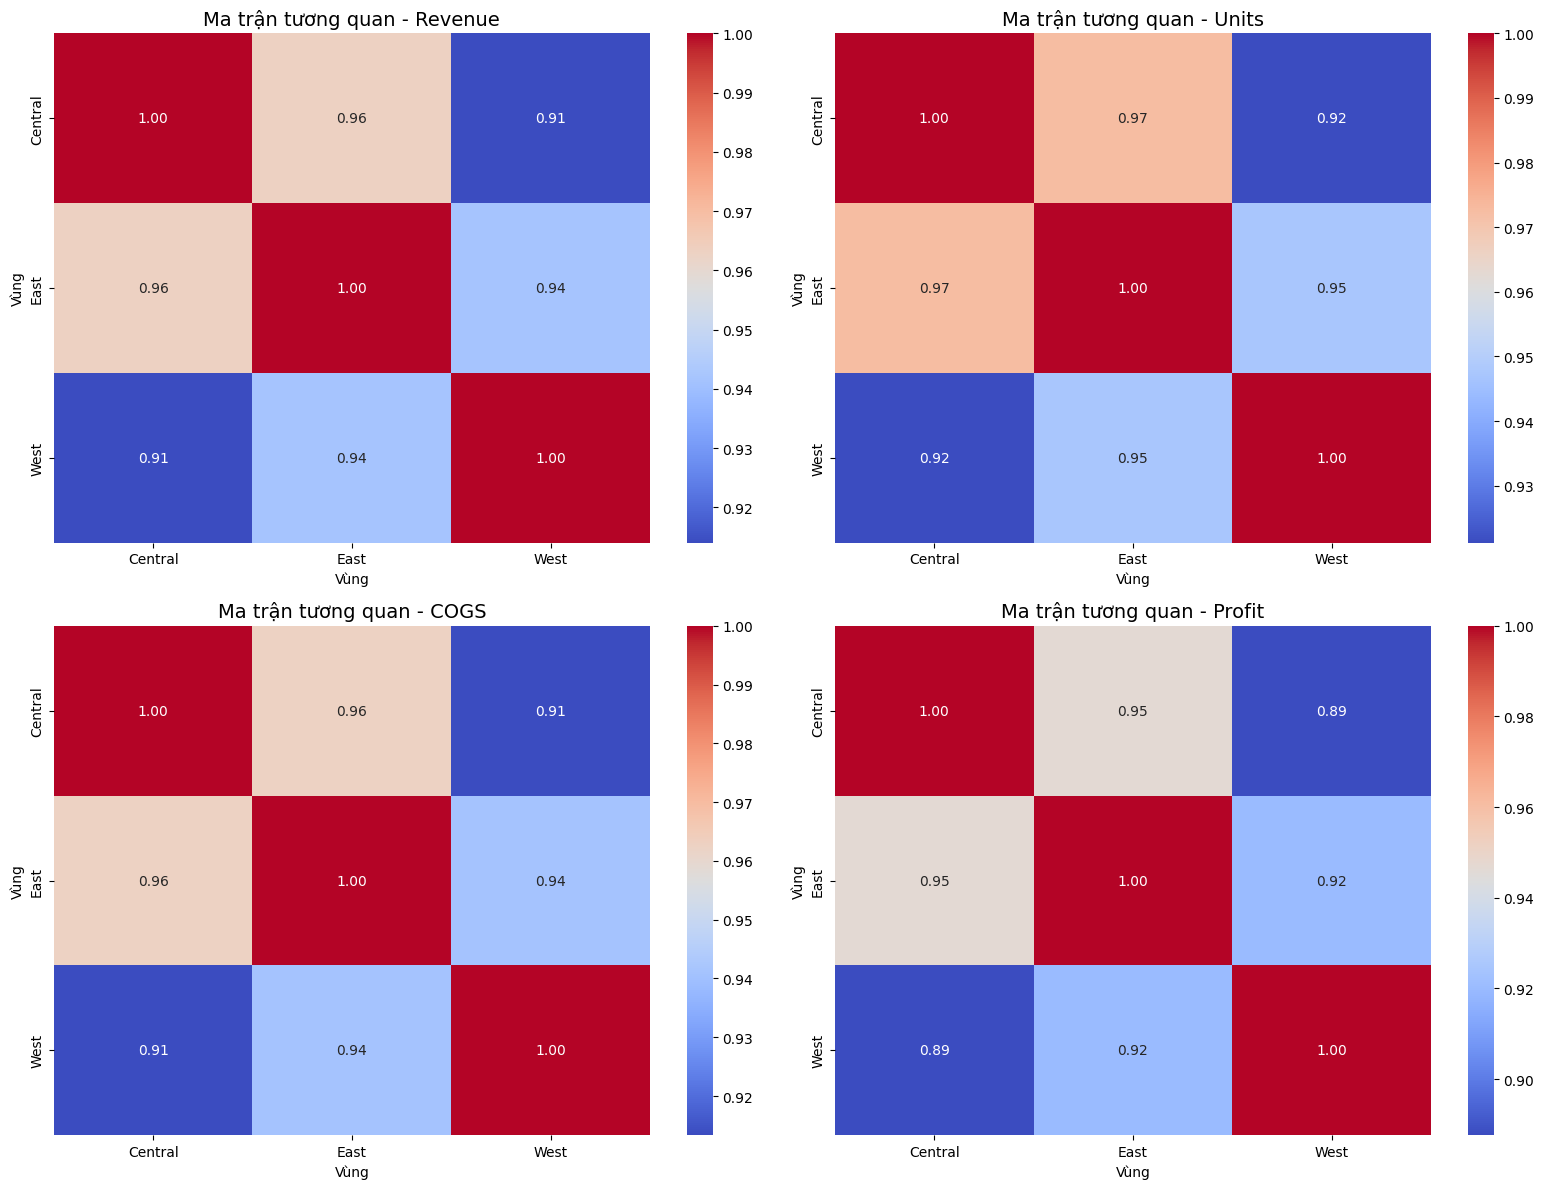

In [29]:
# Tắt cảnh báo (nếu có)
warnings.filterwarnings('ignore')

# Gộp dữ liệu: kết nối bảng train, geography và product dựa theo Zip và ProductID
df = df_train.merge(df_geography, on='Zip', how='left')\
             .merge(df_product, on='ProductID', how='left')

# Đảm bảo cột Date ở định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

# Tính thêm cột Lợi nhuận
df['Profit'] = df['Revenue'] - df['COGS']

# Nhóm dữ liệu theo ngày và vùng: tổng hợp các chỉ số
agg_data = df.groupby(['Date', 'Region']).sum()[['Revenue', 'Units', 'COGS', 'Profit']].reset_index()

# Danh sách các metric cần tính tương quan
metrics = ['Revenue', 'Units', 'COGS', 'Profit']

# Tạo figure với 4 subplot (2 hàng x 2 cột)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

# Vẽ heatmap cho từng metric trong subplot riêng
for i, metric in enumerate(metrics):
    # Tạo bảng pivot: chỉ mục là Date, cột là Region, giá trị là metric
    pivot_df = agg_data.pivot(index='Date', columns='Region', values=metric)
    # Tính ma trận tương quan giữa các vùng
    corr_matrix = pivot_df.corr()
    
    # Vẽ heatmap lên subplot tương ứng
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[i])
    axes[i].set_title(f'Ma trận tương quan - {metric}', fontsize=14)
    axes[i].set_xlabel('Vùng', fontsize=10)
    axes[i].set_ylabel('Vùng', fontsize=10)

plt.tight_layout()
plt.show()

### Đánh giá:
- Tất cả các hệ số tương quan đều dương và khá cao (thường trên 0.8), cho thấy sự biến động của các chỉ số (Doanh thu, Doanh số, Giá vốn, Lợi nhuận) ở các vùng có xu hướng đồng nhất. Tức là khi một vùng có xu hướng tăng/giảm ở chỉ số nào đó, các vùng khác cũng có xu hướng tăng/giảm tương tự. Điều này gợi ý rằng các vùng có thể chịu tác động chung từ các yếu tố thị trường hoặc yếu tố thời vụ.
- Trong cả 4 biểu đồ, cặp vùng East - West (ví dụ) thường có tương quan cao nhất (xấp xỉ trên 0.9), cho thấy hai vùng này có sự dao động khá tương đồng.
### Ý nghĩa:
- Nếu mục tiêu là đa dạng hóa thị trường hoặc tìm vùng có xu hướng riêng, thì kết quả này cho thấy hầu như các vùng đều biến động khá giống nhau, có thể chịu tác động tương tự từ xu hướng kinh tế chung hoặc chiến lược kinh doanh.
- Trong trường hợp muốn dự đoán doanh số hoặc lợi nhuận cho một vùng, có thể sử dụng thông tin từ các vùng còn lại, bởi các chỉ số mang tính đồng biến cao.

## 15. Phân tích yếu tố mùa vụ theo khu vực

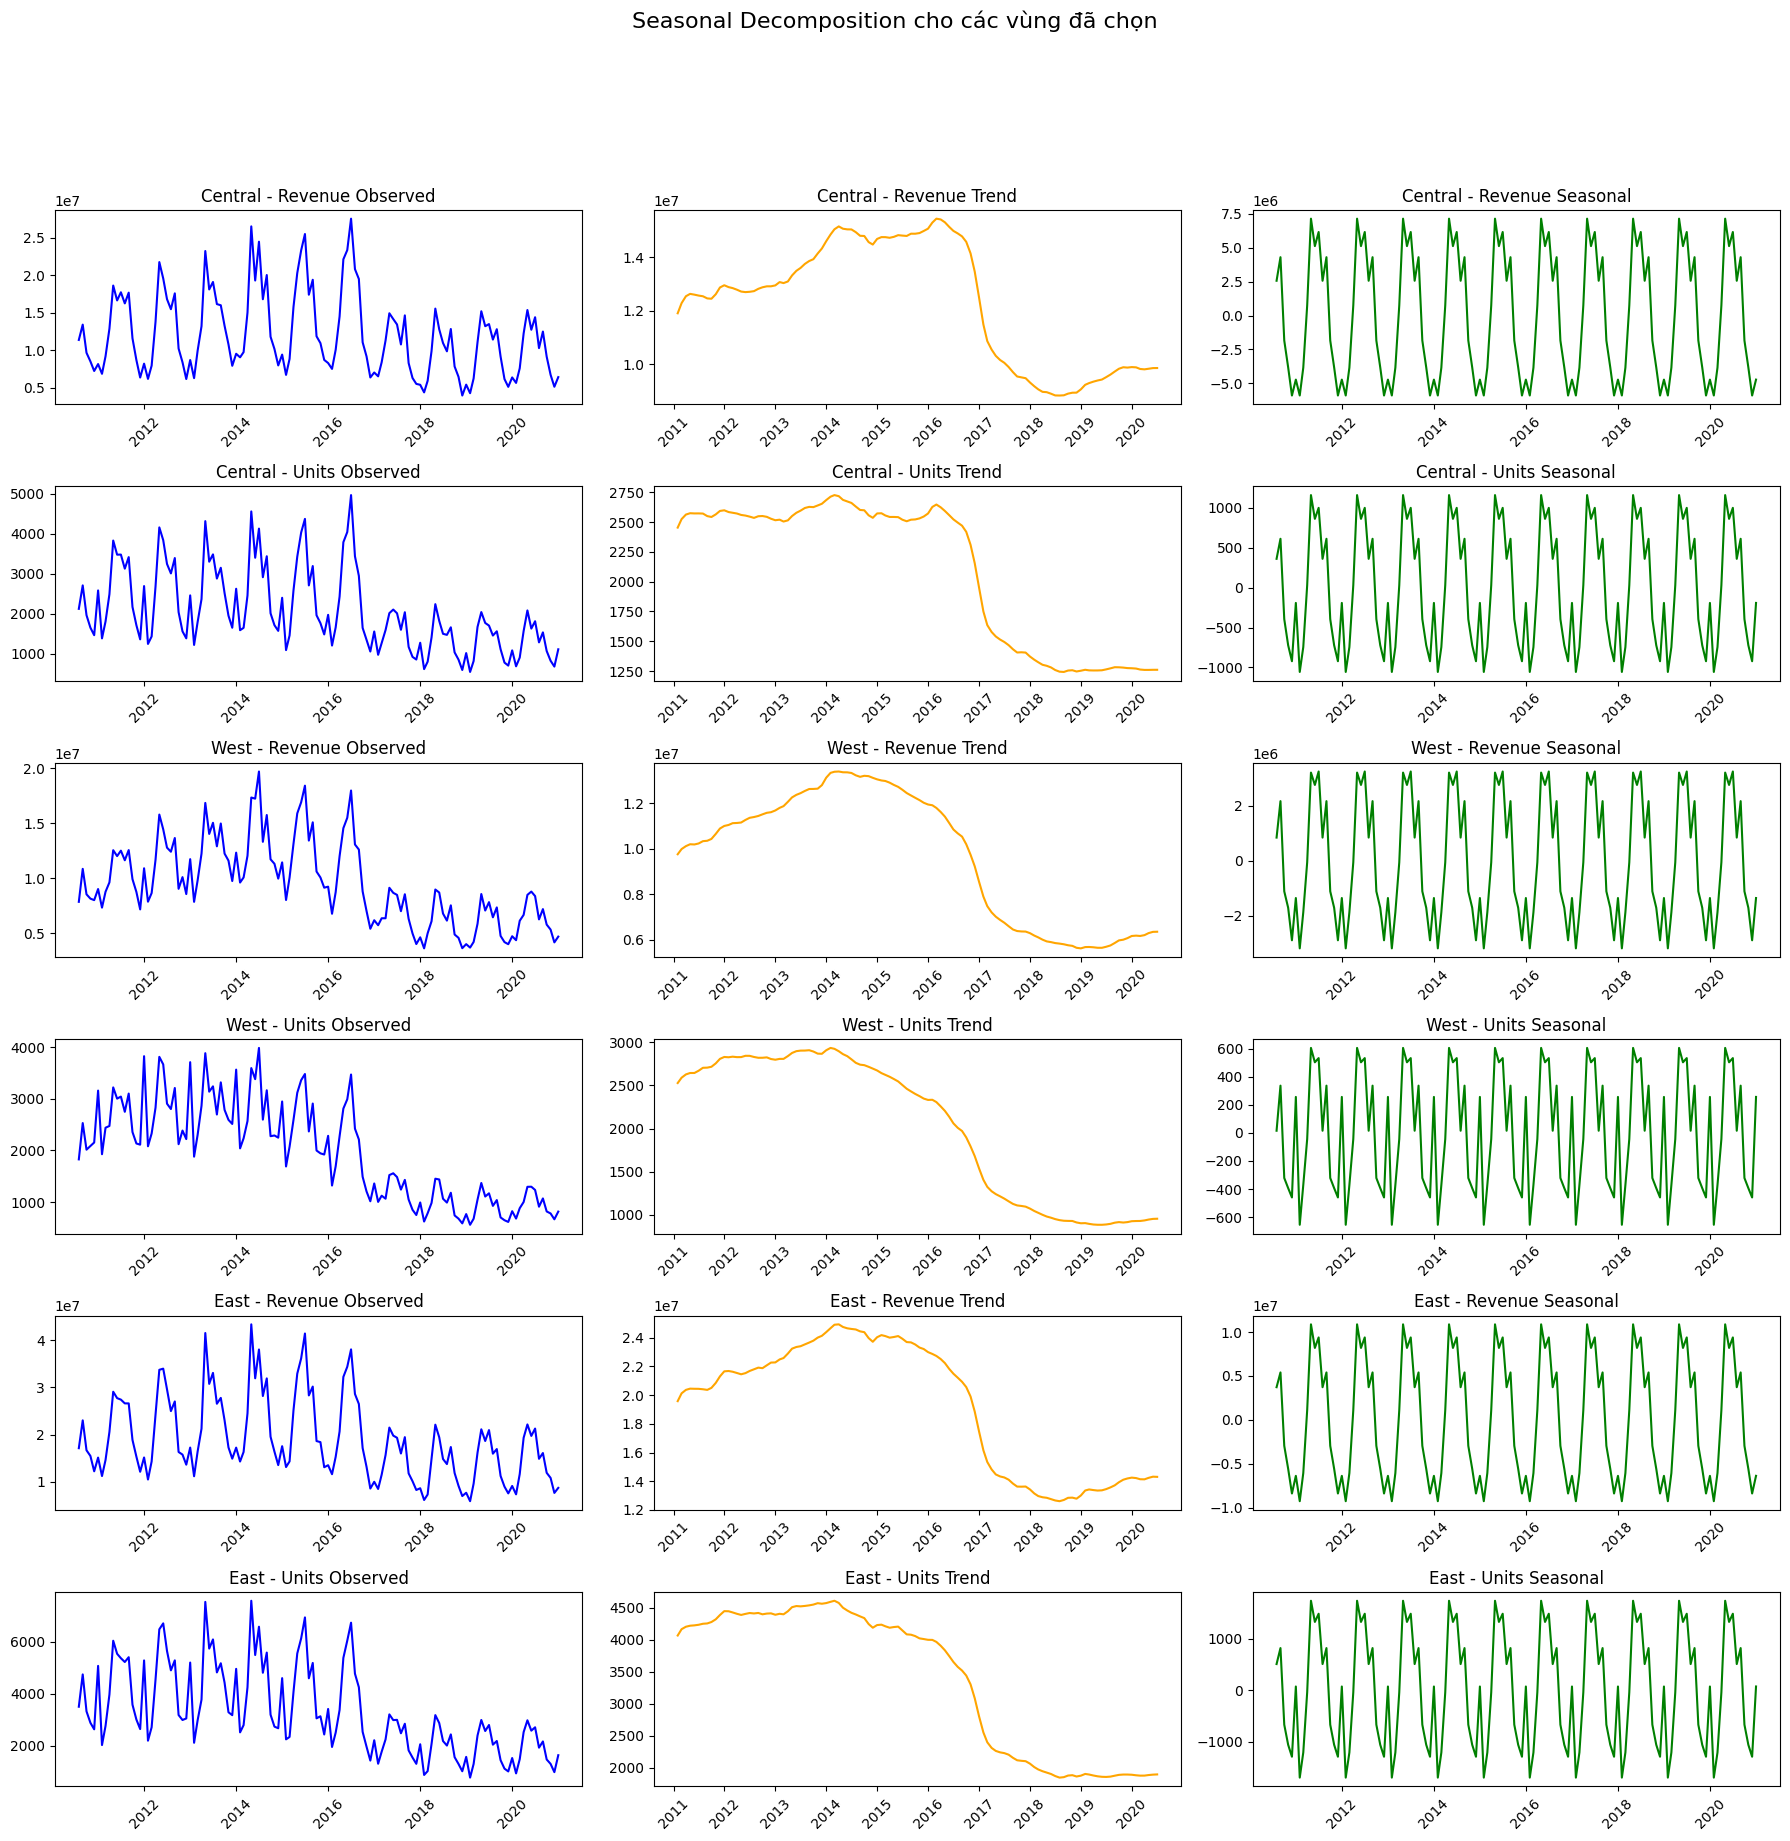

In [5]:
from dataflow import df_train, df_test, df_geography, df_product
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose

# Tắt các cảnh báo (nếu có)
warnings.filterwarnings('ignore')

# Gộp dữ liệu: kết nối bảng train, geography và product theo Zip và ProductID
df = df_train.merge(df_geography, on='Zip', how='left')\
             .merge(df_product, on='ProductID', how='left')

# Chuyển cột Date sang kiểu datetime
df['Date'] = pd.to_datetime(df['Date'])

# Lấy danh sách các vùng
regions = df['Region'].unique()

# Chỉ lấy 3 vùng đầu tiên (có thể điều chỉnh lại nếu cần)
selected_regions = regions[:3]

# Danh sách chỉ số cần phân rã
metrics = ['Revenue', 'Units']

# List để lưu kết quả decomposition dưới dạng tuple: (region, metric, decomposition)
decomp_results = []

# Duyệt qua từng vùng đã chọn
for region in selected_regions:
    df_region = df[df['Region'] == region].copy()
    # Đặt Date làm index để resample
    df_region.set_index('Date', inplace=True)
    # Resample theo tháng, tính tổng các chỉ số
    monthly_data = df_region.resample('M').sum(numeric_only=True)[['Revenue', 'Units']]
    
    for metric in metrics:
        series = monthly_data[metric].dropna()
        # Kiểm tra nếu chuỗi không đủ 24 điểm
        if len(series) < 24:
            print(f"[CẢNH BÁO] Dữ liệu {metric} của vùng {region} không đủ dài để decomposition.")
            continue
        # Thực hiện Seasonal Decomposition (model cộng tuyến, chu kỳ 12 tháng)
        decomposition = seasonal_decompose(series, model='additive', period=12)
        decomp_results.append((region, metric, decomposition))

# Nếu có đủ kết quả, số lượng decomposition nên bằng 6 (3 vùng x 2 metric)
n_decomp = len(decomp_results)

# Tạo figure với n_decomp hàng và 3 cột (mỗi decomposition hiển thị 3 thành phần)
fig, axes = plt.subplots(nrows=n_decomp, ncols=3, figsize=(18, n_decomp * 3))

# Nếu chỉ có một hàng, axes sẽ không phải 2 chiều, đảm bảo nó luôn là mảng 2D
if n_decomp == 1:
    axes = [axes]

# Vẽ từng decomposition
for i, (region, metric, dec) in enumerate(decomp_results):
    # Observed
    axes[i][0].plot(dec.observed, color='blue')
    axes[i][0].set_title(f"{region} - {metric} Observed")
    
    # Trend
    axes[i][1].plot(dec.trend, color='orange')
    axes[i][1].set_title(f"{region} - {metric} Trend")
    
    # Seasonal
    axes[i][2].plot(dec.seasonal, color='green')
    axes[i][2].set_title(f"{region} - {metric} Seasonal")
    
    # Điều chỉnh tick của trục x cho từng subplot
    for j in range(3):
        axes[i][j].tick_params(axis='x', rotation=45)

fig.suptitle("Seasonal Decomposition cho các vùng đã chọn", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Nhận xét:
- **Observed** cho thấy dữ liệu có tính mùa vụ rõ (các đỉnh/đáy lặp lại).
- **Trend** nhìn chung có xu hướng giảm về cuối chuỗi ở cả 3 vùng, rõ rệt hơn với Revenue.
- **Seasonal** có biên độ dao động đều đặn, thường trùng pha giữa các vùng, cho thấy yếu tố mùa vụ chung theo tháng/năm.
- Do vậy, khi lập kế hoạch hoặc dự báo, cần quan tâm cả yếu tố mùa vụ (đỉnh/đáy) và xu hướng giảm dài hạn, đặc biệt là với Revenue.
### Ý nghĩa: 
Mô hình **Seasonal Decomposition** cho thấy cả 3 vùng (Central, West, East) đều có chu kỳ mùa vụ tương đối giống nhau, nhưng có xu hướng giảm dần về cuối chuỗi (nhất là với doanh thu). Việc hiểu rõ đặc điểm này giúp doanh nghiệp lên kế hoạch về hàng tồn kho, khuyến mãi, hay dự báo doanh số/doanh thu sát với thực tế hơn.

## 16. Phân tích mô hình VAR cho 3 biến doanh thu của 3 vùng, 3 biến units của 3 vùng

VAR Revenue - Order Selection:
  VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        88.15       88.23   1.927e+38       88.18
1        85.82       86.11   1.864e+37       85.94
2        85.67       86.17   1.605e+37       85.87
3        85.31       86.03   1.118e+37       85.60
4        85.12       86.06   9.302e+36       85.50
5        84.76       85.92   6.533e+36       85.23
6        84.51      85.88*   5.111e+36       85.07
7        84.57       86.15   5.424e+36       85.21
8        84.50       86.30   5.072e+36       85.23
9        84.45       86.46   4.884e+36       85.27
10       84.40       86.63   4.706e+36       85.31
11       84.22       86.67   3.989e+36       85.21
12      83.98*       86.65  3.200e+36*      85.06*
--------------------------------------------------
  Summary of Regression Results   
Model:                         VAR
Method:                        

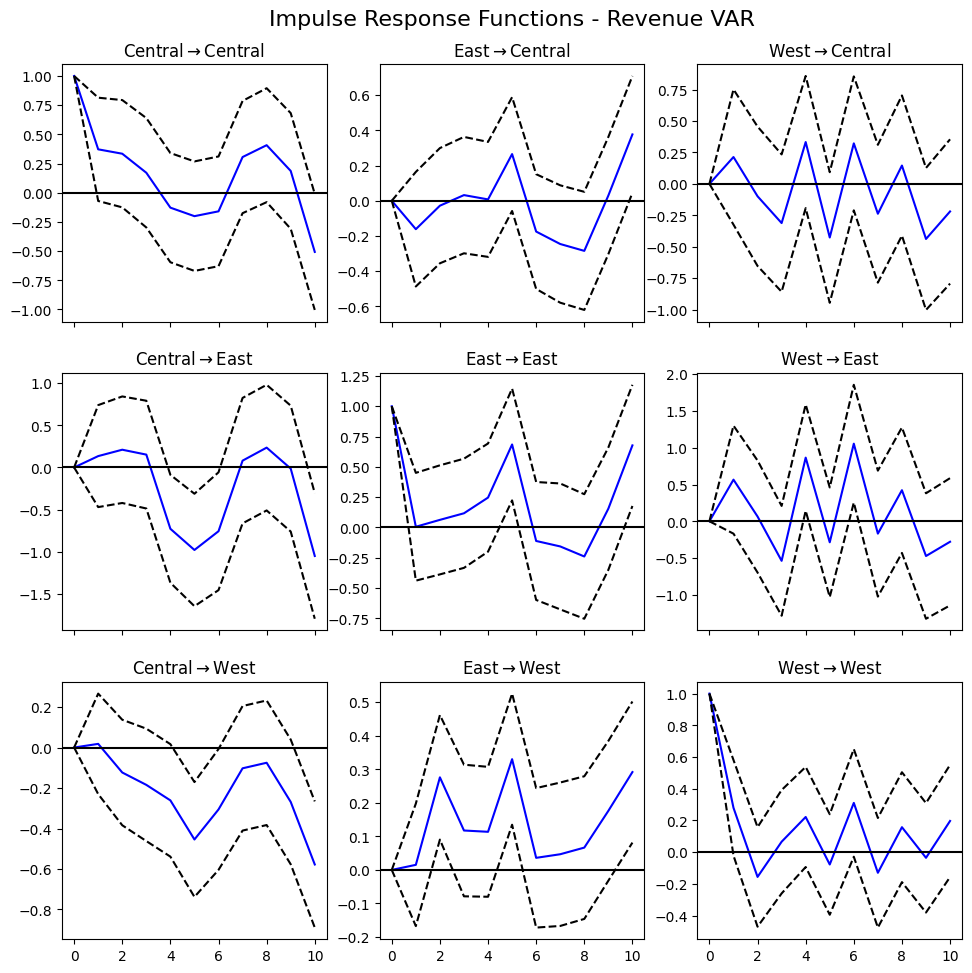

VAR Units - Order Selection:
  VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        36.99       37.06   1.157e+16       37.02
1        34.89       35.18   1.425e+15       35.01
2        34.70       35.20   1.173e+15       34.90
3        34.58       35.30   1.039e+15       34.87
4        34.25       35.19   7.527e+14       34.63
5        33.78       34.93   4.694e+14       34.24
6        33.51      34.87*   3.593e+14       34.06
7        33.59       35.18   3.942e+14       34.24
8        33.53       35.33   3.716e+14       34.26
9        33.50       35.51   3.634e+14       34.31
10       33.37       35.61   3.254e+14       34.28
11       33.39       35.84   3.348e+14       34.38
12      32.97*       35.63  2.239e+14*      34.05*
--------------------------------------------------
  Summary of Regression Results   
Model:                         VAR
Method:                        OL

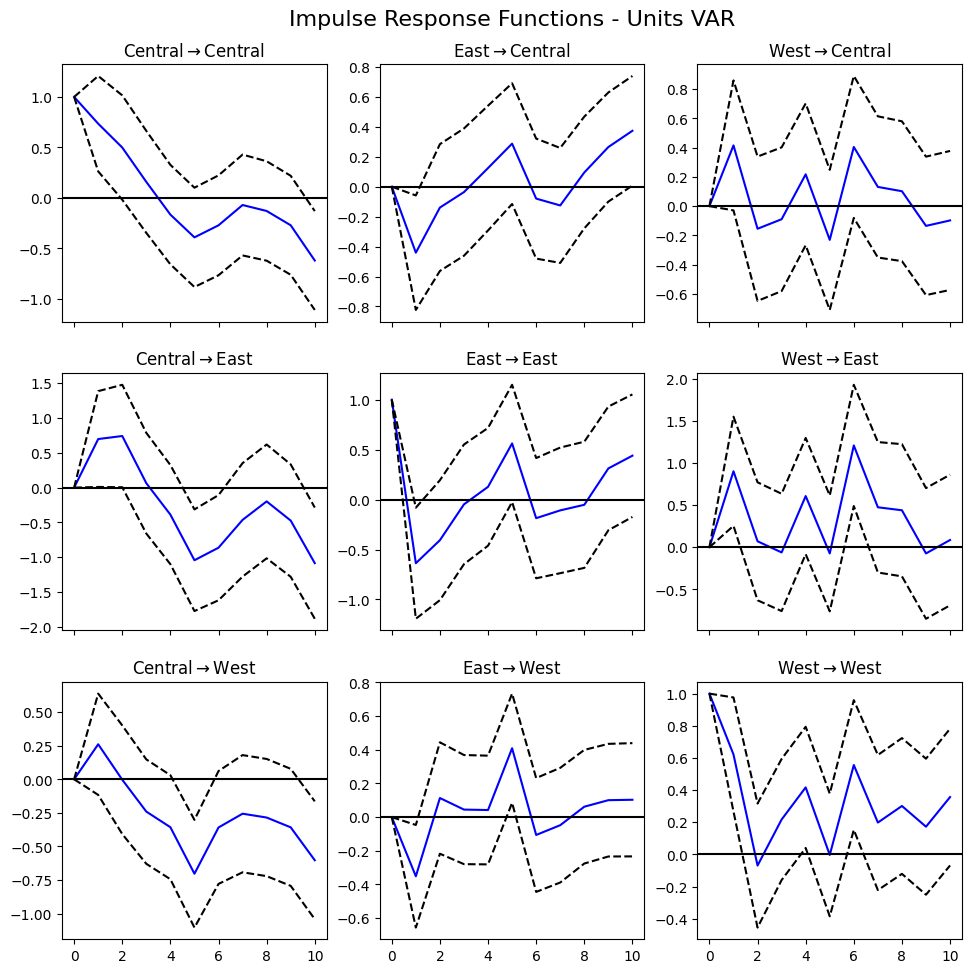

In [33]:
from dataflow import df_train, df_test, df_geography, df_product
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.api import VAR

# Tắt các cảnh báo (nếu có)
warnings.filterwarnings('ignore')

# Gộp dữ liệu: kết nối bảng train, geography và product dựa theo Zip và ProductID
df = df_train.merge(df_geography, on='Zip', how='left')\
             .merge(df_product, on='ProductID', how='left')

# Chuyển cột Date sang kiểu datetime
df['Date'] = pd.to_datetime(df['Date'])

# Nhóm dữ liệu theo tháng và vùng, tính tổng doanh thu và doanh số
monthly = df.groupby([pd.Grouper(key='Date', freq='M'), 'Region']).sum(numeric_only=True)[['Revenue', 'Units']].reset_index()

# Tạo bảng pivot: hàng là Date, cột là các vùng
revenue_pivot = monthly.pivot(index='Date', columns='Region', values='Revenue')
units_pivot   = monthly.pivot(index='Date', columns='Region', values='Units')

# Chọn 3 vùng (giả sử 3 cột đầu tiên) - bạn có thể điều chỉnh tùy theo nhu cầu
revenue_pivot = revenue_pivot.iloc[:, :3]
units_pivot   = units_pivot.iloc[:, :3]

# Loại bỏ các dòng thiếu dữ liệu (nếu có)
revenue_pivot = revenue_pivot.dropna()
units_pivot   = units_pivot.dropna()

### VAR cho doanh thu (Revenue)
# Ước lượng mô hình VAR
model_rev = VAR(revenue_pivot)
lag_order_rev = model_rev.select_order(maxlags=12)
print("VAR Revenue - Order Selection:\n", lag_order_rev.summary())
# Lựa chọn số lag theo tiêu chí AIC (nếu không có, chọn 1)
lag_rev = lag_order_rev.selected_orders.get('aic', 1)
results_rev = model_rev.fit(lag_rev)
print(results_rev.summary())

# Tính và vẽ đồ thị đáp ứng xung cho mô hình doanh thu
irf_rev = results_rev.irf(10)  # tính đáp ứng xung qua 10 kỳ
irf_rev.plot(orth=False)
plt.suptitle("Impulse Response Functions - Revenue VAR", fontsize=16)
plt.show()

### VAR cho doanh số (Units)
# Ước lượng mô hình VAR
model_units = VAR(units_pivot)
lag_order_units = model_units.select_order(maxlags=12)
print("VAR Units - Order Selection:\n", lag_order_units.summary())
lag_units = lag_order_units.selected_orders.get('aic', 1)
results_units = model_units.fit(lag_units)
print(results_units.summary())

# Tính và vẽ đồ thị đáp ứng xung cho mô hình doanh số
irf_units = results_units.irf(10)  # tính đáp ứng xung qua 10 kỳ
irf_units.plot(orth=False)
plt.suptitle("Impulse Response Functions - Units VAR", fontsize=16)
plt.show()


### Nhận xét chung về VAR - Revenue
a, Quan sát cho thấy phản ứng ban đầu thường dương (vượt trục 0) hoặc âm tùy vùng, sau đó dao động và dần trở về gần 0 ở các kỳ sau. Điều này cho thấy hiệu ứng sốc không kéo dài quá nhiều kỳ.
Off-diagonal (Cross response)

b, Các ô (Central → East), (Central → West), (East → Central), v.v. biểu thị phản ứng của một vùng khi có cú sốc từ vùng khác. 
- Một số đường IRF cắt trục 0 và nằm trong khoảng tin cậy (đường gạch) khá rộng, chứng tỏ mức độ chắc chắn (hoặc ý nghĩa thống kê) không quá cao.
- Nếu đường xanh (đường IRF) phần lớn nằm trong dải tin cậy 95% (đường gạch) quanh 0, ta có thể nói hiệu ứng không quá rõ hoặc không có ý nghĩa thống kê.

c, Biên độ và dấu của IRF: 
- Ở một vài ô, phản ứng ban đầu có thể dương (có nghĩa cú sốc ở vùng A khiến doanh thu vùng B tăng nhẹ ở kỳ sau), sau đó chuyển âm hoặc quay về 0. 
- Nhìn chung, các đường IRF dao động quanh 0 và tắt dần trong vòng ~5–7 kỳ, cho thấy tính dừng và phản ứng nhất thời của hệ thống VAR Revenue.

d, Kết luận Revenue VAR:
- Mô hình cho thấy các vùng có ảnh hưởng qua lại, nhưng không kéo dài.
- Mức độ ảnh hưởng giữa các vùng không quá lớn (vì IRF nhanh chóng về 0).
- Cần lưu ý dải tin cậy rộng ở nhiều ô, nên nhiều hiệu ứng có thể không quá chắc chắn (chưa rõ ý nghĩa thống kê cao).

### Nhận xét chung về VAR - Units
a, Diagonals (Own response)
- (Central → Central), (East → East), (West → West) cho thấy khi vùng đó có cú sốc về doanh số, vùng chính nó phản ứng ngay lập tức rồi dần hồi về 0.
- Biên độ phản ứng có thể nhỏ hơn so với Revenue, hoặc có dạng dao động dương-âm.

b, Cross response (Off-diagonal)
- So với Revenue, các đường IRF Units cũng dao động quanh 0, cho thấy hiệu ứng lẫn nhau giữa các vùng tồn tại nhưng không mạnh và nhanh chóng tiêu tan.
- Có trường hợp đường IRF bắt đầu âm, rồi dần tiến về 0, hoặc ngược lại.

c, Ý nghĩa thống kê
- Nhiều đường IRF nằm trong dải tin cậy khá rộng, nên chưa thể kết luận chắc chắn về độ mạnh của các tác động chéo.
- Một số lag ban đầu (kỳ 1, 2) có thể có hiệu ứng rõ hơn, sau đó giảm dần.

d, Kết luận Units VAR
- Tương tự Revenue, các cú sốc lên doanh số giữa các vùng có ảnh hưởng ngắn hạn.
- Hệ thống nhanh chóng về trạng thái cân bằng (0) sau vài kỳ.
- Cần xem xét dải tin cậy để đánh giá mức độ tin cậy của các cú sốc.

### Đánh giá:
a, Tính chất “phản ứng ngắn hạn”: Cả Revenue lẫn Units ở mỗi vùng dường như chỉ bị ảnh hưởng trong 1 vài kỳ rồi trở về cân bằng, gợi ý rằng hiệu ứng lan tỏa (spillover) giữa các vùng không kéo dài.

b, Độ rộng khoảng tin cậy: Nếu đường IRF không vượt ra khỏi khoảng tin cậy 95% so với 0, ta có thể nói tác động chưa đủ mạnh hoặc không có ý nghĩa thống kê.

c, Hàm ý kinh doanh:
- Nếu một cú sốc (ví dụ, chiến dịch marketing hay biến động giá) xảy ra ở vùng A, nó có thể ảnh hưởng đến vùng B/C, nhưng không quá lớn và không bền.
- Các nhà quản lý có thể tập trung chiến lược riêng biệt cho từng vùng, vì mức lan tỏa không quá cao.

### Ý nghĩa: 
Mô hình VAR cho thấy tác động giữa các vùng về doanh thu (Revenue) và doanh số (Units) có tồn tại nhưng không quá mạnh và tắt dần trong vài kỳ. Điều này gợi ý các vùng tương đối độc lập trong trung/dài hạn, và hiệu ứng sốc chủ yếu mang tính ngắn hạn.

## 17. Phân tích biểu đồ ACF, PACF cho doanh thu, doanh số từng vùng.

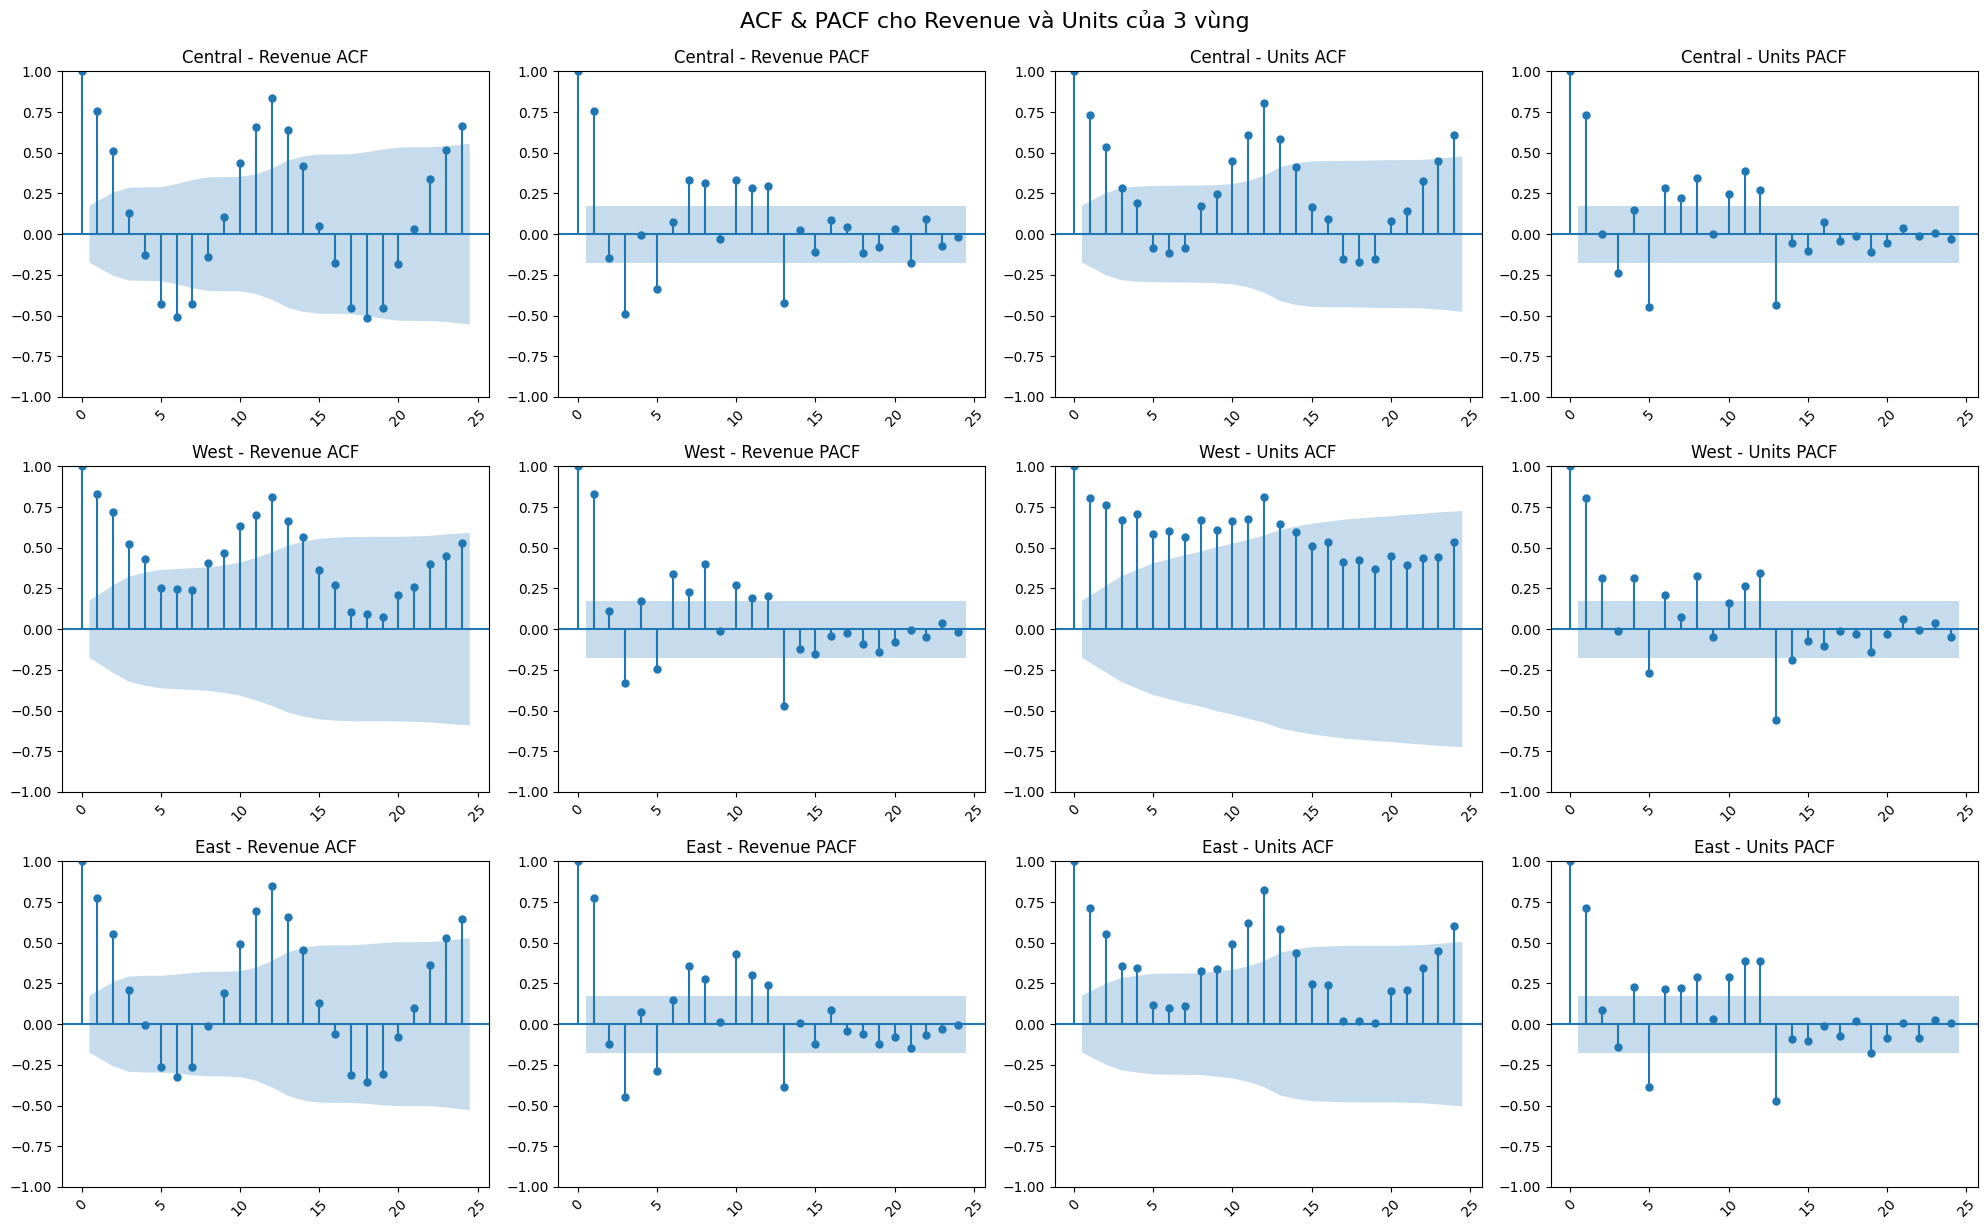

In [8]:
from dataflow import df_train, df_test, df_geography, df_product
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Tắt các cảnh báo (nếu có)
warnings.filterwarnings('ignore')

# Gộp dữ liệu: kết nối bảng train, geography và product theo Zip và ProductID
df = df_train.merge(df_geography, on='Zip', how='left')\
             .merge(df_product, on='ProductID', how='left')

# Chuyển đổi cột Date sang kiểu datetime
df['Date'] = pd.to_datetime(df['Date'])

# Lấy danh sách các vùng
regions = df['Region'].unique()

# Chọn 3 vùng đầu tiên (có thể điều chỉnh nếu cần)
selected_regions = regions[:3]

# Danh sách các chỉ số cần phân tích
metrics = ['Revenue', 'Units']

# Tạo figure với 3 hàng x 4 cột (mỗi hàng cho 1 vùng, mỗi hàng gồm 4 subplot: ACF/PACF của Revenue và Units)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12), sharex=False)

# Duyệt qua từng vùng đã chọn
for i, region in enumerate(selected_regions):
    # Lọc dữ liệu cho vùng hiện tại và đặt Date làm index
    df_region = df[df['Region'] == region].copy()
    df_region.set_index('Date', inplace=True)
    
    # Resample theo tháng, tính tổng các chỉ số
    monthly_data = df_region.resample('M').sum(numeric_only=True)[['Revenue', 'Units']]
    
    # Lặp qua các chỉ số
    for j, metric in enumerate(metrics):
        series = monthly_data[metric].dropna()
        # Kiểm tra nếu chuỗi không đủ 24 điểm
        if len(series) < 24:
            print(f"[CẢNH BÁO] Dữ liệu {metric} của vùng {region} không đủ để phân tích ACF/PACF.")
            continue
        
        # Với chỉ số này, ta vẽ ACF và PACF
        # Với Revenue: đặt ở cột 0 (ACF) và cột 1 (PACF) của hàng tương ứng
        # Với Units: đặt ở cột 2 (ACF) và cột 3 (PACF)
        if metric == 'Revenue':
            col_acf = 0
            col_pacf = 1
        elif metric == 'Units':
            col_acf = 2
            col_pacf = 3
        
        # Vẽ ACF
        plot_acf(series, ax=axes[i, col_acf], lags=24)
        axes[i, col_acf].set_title(f'{region} - {metric} ACF')
        
        # Vẽ PACF
        plot_pacf(series, ax=axes[i, col_pacf], lags=24)
        axes[i, col_pacf].set_title(f'{region} - {metric} PACF')
        
        # Điều chỉnh tick của trục x cho cả 2 subplot
        axes[i, col_acf].tick_params(axis='x', rotation=45)
        axes[i, col_pacf].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle("ACF & PACF cho Revenue và Units của 3 vùng", fontsize=16, y=1.02)
plt.show()

### ACF (Auto-Correlation Function)
a, Ý nghĩa: ACF cho thấy mức độ tương quan của chuỗi với chính nó ở các độ trễ (lag) khác nhau.

b, Quan sát chung:
- Nhiều cột (correlation) nằm trong khoảng tin cậy (vùng màu xanh), nên không có quá nhiều lag vượt trội.
- Một số lag đầu (ví dụ 1, 2, 3) có thể vượt ngưỡng tin cậy, cho thấy tương quan ngắn hạn của chuỗi.
- Nếu có đỉnh (hoặc đáy) đáng kể ở lag 12 (thường liên quan đến chu kỳ năm, nếu dữ liệu theo tháng) thì đó là dấu hiệu mùa vụ.
- Nhìn chung, có vẻ các giá trị ACF giảm dần và dao động quanh 0, không xuất hiện “tail” kéo dài, nên không cho thấy chuỗi dừng (stationary) quá rõ hay phi dừng (non-stationary) quá mạnh.

### PACF (Partial Auto-Correlation Function)
a, Ý nghĩa: PACF đo mức độ tương quan một phần giữa chuỗi và chính nó ở độ trễ k, sau khi loại bỏ ảnh hưởng của các độ trễ trung gian.

b, Quan sát chung:
- Thông thường, khi PACF có một vài lag vượt ngưỡng tin cậy (ví dụ lag 1, lag 2), ta suy ra được bậc của mô hình AR có thể phù hợp (chẳng hạn AR(1) hoặc AR(2)).
- Nếu có một spike mạnh ở lag 1 rồi giảm nhanh, đó là dấu hiệu của AR(1). Nếu có spike mạnh ở lag 12, có thể liên quan đến mùa vụ (SARIMA).

### So sánh Revenue và Units
a, Revenue:
- Thường có biên độ biến động lớn hơn. Nếu ACF/PACF cho thấy một vài lag đầu vượt ngưỡng, có thể Revenue có thành phần AR hay MA nhẹ.
- Nếu có lag 12 nổi bật, gợi ý rằng doanh thu chịu ảnh hưởng theo mùa vụ (các tháng cao điểm/nóng).

b, Units:
- ACF/PACF thường có xu hướng tương tự Revenue, nhưng mức độ (giá trị correlation) có thể khác.
- Có khả năng Units cũng có tính mùa vụ hoặc có độ trễ ngắn hạn (lag 1, 2) phản ánh việc bán hàng ở tháng trước/tăng giảm theo chu kỳ ngắn.

### Đánh giá:
- Mỗi vùng có một số lag ngắn hạn (1, 2, 3) vượt ngưỡng tin cậy, gợi ý thành phần AR hoặc MA bậc thấp.
- Có thể có yếu tố mùa vụ (lag 12) nếu cột correlation ở lag 12 vượt ngưỡng rõ rệt.
- Revenue và Units đều có dấu hiệu tự tương quan, nhưng mức độ khác nhau đôi chút giữa các vùng.
- Khi xây dựng mô hình ARIMA/SARIMA hoặc VAR cho các chuỗi này, bạn cần chú ý các bậc AR/MA (dựa trên PACF/ACF) và yếu tố mùa vụ.
### Ý nghĩa:
- Các quan sát từ ACF/PACF giúp bạn quyết định có nên sử dụng mô hình ARIMA/SARIMA cho từng chuỗi, với bậc AR, MA, và tính mùa vụ (nếu spike ở lag 12) và kiểm tra xem dữ liệu có cần được sai phân (differencing) để trở thành chuỗi dừng không (nếu ACF/PACF không suy giảm rõ ràng).
- Với dữ liệu doanh thu (Revenue) và doanh số (Units), thường có mùa vụ (spike ở lag 12) và tương quan ngắn hạn (spike ở lag 1 hoặc 2).